In [ ]:
pip install torch torchvision kagglehub pillow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 64.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 28.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import kagglehub

# Authenticate Kaggle API
os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

# Download dataset
path = kagglehub.dataset_download("defileroff/comic-faces-paired-synthetic-v2")
print("Path to dataset files:", path)

dataset_dir = path  # Directly use the dataset directory

# Verify dataset structure
print("Dataset Structure:", os.listdir(dataset_dir))

# Set dataset paths
real_faces_path = os.path.join(dataset_dir, "face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces")
cartoon_faces_path = os.path.join(dataset_dir, "face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/comics")

# Check if paths exist
if not os.path.exists(real_faces_path) or not os.path.exists(cartoon_faces_path):
    raise FileNotFoundError("Dataset directories not found. Check dataset structure.")

# Define dataset class
class PairedFaceDataset(Dataset):
    def __init__(self, real_dir, cartoon_dir, transform=None):
        self.real_dir = real_dir
        self.cartoon_dir = cartoon_dir
        self.real_images = sorted(os.listdir(real_dir))  # Ensure images are in order
        self.cartoon_images = sorted(os.listdir(cartoon_dir))
        self.transform = transform

    def __len__(self):
        return min(len(self.real_images), len(self.cartoon_images))  # Match dataset size

    def __getitem__(self, idx):
        real_path = os.path.join(self.real_dir, self.real_images[idx])
        cartoon_path = os.path.join(self.cartoon_dir, self.cartoon_images[idx])

        real_img = Image.open(real_path).convert("RGB")
        cartoon_img = Image.open(cartoon_path).convert("RGB")

        if self.transform:
            real_img = self.transform(real_img)
            cartoon_img = self.transform(cartoon_img)

        return real_img, cartoon_img

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to 256x256
    transforms.RandomHorizontalFlip(),  # Data Augmentation
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Load dataset
dataset = PairedFaceDataset(real_faces_path, cartoon_faces_path, transform=transform)

# Split dataset (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
dataloader_train = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
dataloader_test = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

# Check a sample batch
real_batch, cartoon_batch = next(iter(dataloader_train))
print(f"Train Batch - Real Faces Shape: {real_batch.shape}")
print(f"Train Batch - Cartoon Faces Shape: {cartoon_batch.shape}")

Path to dataset files: /root/.cache/kagglehub/datasets/defileroff/comic-faces-paired-synthetic-v2/versions/1
Dataset Structure: ['face2comics_v2.0.0_by_Sxela', 'samples']


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train Batch - Real Faces Shape: torch.Size([16, 3, 256, 256])
Train Batch - Cartoon Faces Shape: torch.Size([16, 3, 256, 256])


In [ ]:
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import kagglehub

# Authenticate Kaggle API
os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

# Download dataset
path = kagglehub.dataset_download("defileroff/comic-faces-paired-synthetic-v2")
print("Path to dataset files:", path)

dataset_dir = path  # Directly use the dataset directory

# Verify dataset structure
print("Dataset Structure:", os.listdir(dataset_dir))

# Set dataset paths
real_faces_path = os.path.join(dataset_dir, "face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/faces")
cartoon_faces_path = os.path.join(dataset_dir, "face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela/comics")

# Check if paths exist
if not os.path.exists(real_faces_path) or not os.path.exists(cartoon_faces_path):
    raise FileNotFoundError("Dataset directories not found. Check dataset structure.")

# Define dataset class
class PairedFaceDataset(Dataset):
    def __init__(self, real_dir, cartoon_dir, transform=None):
        self.real_dir = real_dir
        self.cartoon_dir = cartoon_dir
        self.real_images = sorted(os.listdir(real_dir))  # Ensure images are in order
        self.cartoon_images = sorted(os.listdir(cartoon_dir))
        self.transform = transform

    def __len__(self):
        return min(len(self.real_images), len(self.cartoon_images))  # Match dataset size

    def __getitem__(self, idx):
        real_path = os.path.join(self.real_dir, self.real_images[idx])
        cartoon_path = os.path.join(self.cartoon_dir, self.cartoon_images[idx])

        real_img = Image.open(real_path).convert("RGB")
        cartoon_img = Image.open(cartoon_path).convert("RGB")

        if self.transform:
            real_img = self.transform(real_img)
            cartoon_img = self.transform(cartoon_img)

        return real_img, cartoon_img

# Define transformations
transform = transforms.Compose([
    transforms.Resize((256, 256)),  # Resize to 256x256
    transforms.RandomHorizontalFlip(),  # Data Augmentation
    transforms.ToTensor(),  # Convert to Tensor
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize to [-1, 1]
])

# Load dataset
dataset = PairedFaceDataset(real_faces_path, cartoon_faces_path, transform=transform)

# Split dataset (80% train, 20% test)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Create DataLoaders
dataloader_train = DataLoader(train_dataset, batch_size=16, shuffle=True, num_workers=4)
dataloader_test = DataLoader(test_dataset, batch_size=16, shuffle=False, num_workers=4)

# Check a sample batch
real_batch, cartoon_batch = next(iter(dataloader_train))
print(f"Train Batch - Real Faces Shape: {real_batch.shape}")
print(f"Train Batch - Cartoon Faces Shape: {cartoon_batch.shape}")

100%|██████████| 2.18G/2.18G [01:47<00:00, 21.8MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/defileroff/comic-faces-paired-synthetic-v2/versions/1
Dataset Structure: ['face2comics_v2.0.0_by_Sxela', 'samples']


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Train Batch - Real Faces Shape: torch.Size([16, 3, 256, 256])
Train Batch - Cartoon Faces Shape: torch.Size([16, 3, 256, 256])


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import time
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import numpy as np

# Set random seeds for reproducibility
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)

# ---------------------------
# 1. Data Preprocessing & Loading
# ---------------------------

# Define dataset paths (adjust these if needed)
dataset_dir = "/root/.cache/kagglehub/datasets/defileroff/comic-faces-paired-synthetic-v2/versions/1/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela"
real_faces_path = os.path.join(dataset_dir, "faces")
cartoon_faces_path = os.path.join(dataset_dir, "comics")
processed_dataset_dir = "Comic_Faces/processed"
os.makedirs(processed_dataset_dir, exist_ok=True)

# Define transforms (resize to 256x256 and normalize to [-1, 1])
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Custom Dataset for paired images
class PairedFaceDataset(Dataset):
    def __init__(self, real_dir, cartoon_dir, transform=None):
        self.real_images = sorted(os.listdir(real_dir))
        self.cartoon_images = sorted(os.listdir(cartoon_dir))
        self.real_dir = real_dir
        self.cartoon_dir = cartoon_dir
        self.transform = transform
        # Use only pairs with matching filenames
        self.valid_pairs = [(r, c) for r, c in zip(self.real_images, self.cartoon_images) if r == c]
        print(f"✅ Found {len(self.valid_pairs)} valid image pairs")

    def __len__(self):
        return len(self.valid_pairs)

    def __getitem__(self, idx):
        real_image_path = os.path.join(self.real_dir, self.valid_pairs[idx][0])
        cartoon_image_path = os.path.join(self.cartoon_dir, self.valid_pairs[idx][1])
        real_image = Image.open(real_image_path).convert("RGB")
        cartoon_image = Image.open(cartoon_image_path).convert("RGB")
        if self.transform:
            real_image = self.transform(real_image)
            cartoon_image = self.transform(cartoon_image)
        return real_image, cartoon_image

# Load the dataset and split into 80% train and 20% test
dataset = PairedFaceDataset(real_faces_path, cartoon_faces_path, transform)
total_samples = len(dataset)
train_size = int(0.8 * total_samples)
test_size = total_samples - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4)

print(f"Total samples: {total_samples} | Train: {train_size} | Test: {test_size}")

# ---------------------------
# 2. Model Definition: Generator with U-Net + TCN and PatchGAN Discriminator
# ---------------------------

# Define a TCN Block for feature extraction over the spatial dimension
class TCNBlock(nn.Module):
    def __init__(self, channels, kernel_size=3, dilation=2):
        super(TCNBlock, self).__init__()
        padding = (kernel_size - 1) * dilation // 2
        self.conv1d = nn.Conv1d(channels, channels, kernel_size, padding=padding, dilation=dilation)
        self.bn = nn.BatchNorm1d(channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        # x: (B, C, H, W) -> reshape to (B, C, H*W)
        B, C, H, W = x.shape
        x_reshaped = x.view(B, C, H * W)
        out = self.conv1d(x_reshaped)
        out = self.bn(out)
        out = self.relu(out)
        out = out.view(B, C, H, W)
        return out + x  # Add residual connection

# U-Net Generator with TCN and skip connections
class UNetTCNGenerator(nn.Module):
    def __init__(self):
        super(UNetTCNGenerator, self).__init__()
        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # 256->128
            nn.LeakyReLU(0.2)
        )
        self.enc2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 128->64
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.enc3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 64->32
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )
        self.enc4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1), # 32->16
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )
        self.enc5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1), # 16->8
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )

        # Bottleneck with TCN blocks
        self.tcn1 = TCNBlock(channels=512, kernel_size=3, dilation=1)
        self.tcn2 = TCNBlock(channels=512, kernel_size=3, dilation=2)
        self.tcn3 = TCNBlock(channels=512, kernel_size=3, dilation=4)

        # Decoder with skip connections
        self.dec5 = nn.Sequential(
            nn.ConvTranspose2d(512, 512, kernel_size=4, stride=2, padding=1), # 8->16
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.dec4 = nn.Sequential(
            nn.ConvTranspose2d(512*2, 256, kernel_size=4, stride=2, padding=1), # 16->32
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.dec3 = nn.Sequential(
            nn.ConvTranspose2d(256*2, 128, kernel_size=4, stride=2, padding=1), # 32->64
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.dec2 = nn.Sequential(
            nn.ConvTranspose2d(128*2, 64, kernel_size=4, stride=2, padding=1),  # 64->128
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.dec1 = nn.Sequential(
            nn.ConvTranspose2d(64*2, 3, kernel_size=4, stride=2, padding=1),   # 128->256
            nn.Tanh()  # output in [-1, 1]
        )

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)   # (B,64,128,128)
        e2 = self.enc2(e1)  # (B,128,64,64)
        e3 = self.enc3(e2)  # (B,256,32,32)
        e4 = self.enc4(e3)  # (B,512,16,16)
        e5 = self.enc5(e4)  # (B,512,8,8)

        # Bottleneck with TCN blocks
        b = self.tcn1(e5)
        b = self.tcn2(b)
        b = self.tcn3(b)

        # Decoder with skip connections
        d5 = self.dec5(b)                  # (B,512,16,16)
        d4 = self.dec4(torch.cat([d5, e4], 1))  # (B,256,32,32)
        d3 = self.dec3(torch.cat([d4, e3], 1))  # (B,128,64,64)
        d2 = self.dec2(torch.cat([d3, e2], 1))  # (B,64,128,128)
        d1 = self.dec1(torch.cat([d2, e1], 1))  # (B,3,256,256)

        return d1

# PatchGAN Discriminator
class PatchGANDiscriminator(nn.Module):
    def __init__(self):
        super(PatchGANDiscriminator, self).__init__()
        # Input: concatenated real and cartoon images (6 channels)
        self.model = nn.Sequential(
            # Layer 1: no normalization
            nn.Conv2d(6, 64, kernel_size=4, stride=2, padding=1),  # 256->128
            nn.LeakyReLU(0.2, inplace=True),

            # Layer 2
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 128->64
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            # Layer 3
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # 64->32
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            # Layer 4
            nn.Conv2d(256, 512, kernel_size=4, stride=1, padding=1),  # 32->31
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            # Output layer
            nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=1),  # 31->30
        )

    def forward(self, real_img, cartoon_img):
        # Concatenate the input and output images along the channel dimension
        x = torch.cat([real_img, cartoon_img], dim=1)
        return self.model(x)

# ---------------------------
# 3. Loss Functions
# ---------------------------

# GAN Loss
class GANLoss(nn.Module):
    def __init__(self, target_real_label=1.0, target_fake_label=0.0):
        super(GANLoss, self).__init__()
        self.register_buffer('real_label', torch.tensor(target_real_label))
        self.register_buffer('fake_label', torch.tensor(target_fake_label))
        self.loss = nn.BCEWithLogitsLoss()

    def __call__(self, prediction, target_is_real):
        if target_is_real:
            target_tensor = self.real_label.expand_as(prediction)
        else:
            target_tensor = self.fake_label.expand_as(prediction)
        return self.loss(prediction, target_tensor)

# ---------------------------
# 4. Training Function
# ---------------------------

def train(generator, discriminator, train_loader, test_loader, num_epochs, save_path='generator.pth'):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Move models to device
    generator = generator.to(device)
    discriminator = discriminator.to(device)

    # Setup optimizers
    optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

    # Setup losses
    gan_loss = GANLoss().to(device)
    l1_loss = nn.L1Loss()

    # Lambda for L1 loss weight
    lambda_L1 = 100

    # Initialize lists to store losses
    g_losses = []
    d_losses = []

    # Training loop
    print("Starting training...\n")
    for epoch in range(num_epochs):
        generator.train()
        discriminator.train()

        epoch_g_loss = 0
        epoch_d_loss = 0
        start_time = time.time()

        for i, (real_imgs, cartoon_imgs) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")):
            real_imgs = real_imgs.to(device)
            cartoon_imgs = cartoon_imgs.to(device)
            batch_size = real_imgs.size(0)

            # Generate fake cartoon images
            fake_cartoons = generator(real_imgs)

            # -----------------------
            # Train Discriminator
            # -----------------------
            optimizer_D.zero_grad()

            # Real loss
            pred_real = discriminator(real_imgs, cartoon_imgs)
            loss_d_real = gan_loss(pred_real, True)

            # Fake loss
            pred_fake = discriminator(real_imgs, fake_cartoons.detach())
            loss_d_fake = gan_loss(pred_fake, False)

            # Combined loss
            loss_d = (loss_d_real + loss_d_fake) * 0.5
            loss_d.backward()
            optimizer_D.step()

            # -----------------------
            # Train Generator
            # -----------------------
            optimizer_G.zero_grad()

            # First, make discriminator classify generated cartoons as real
            pred_fake = discriminator(real_imgs, fake_cartoons)
            loss_g_gan = gan_loss(pred_fake, True)

            # Second, add L1 loss for pixel-wise differences
            loss_g_l1 = l1_loss(fake_cartoons, cartoon_imgs) * lambda_L1

            # Combined loss
            loss_g = loss_g_gan + loss_g_l1
            loss_g.backward()
            optimizer_G.step()

            # Save losses for monitoring
            epoch_g_loss += loss_g.item()
            epoch_d_loss += loss_d.item()

            # Print progress
            if (i+1) % 50 == 0:
                print(f"[Epoch {epoch+1}/{num_epochs}] [Batch {i+1}/{len(train_loader)}] "
                      f"[D loss: {loss_d.item():.4f}] [G loss: {loss_g.item():.4f}]")

        # Calculate average epoch losses
        avg_g_loss = epoch_g_loss / len(train_loader)
        avg_d_loss = epoch_d_loss / len(train_loader)
        g_losses.append(avg_g_loss)
        d_losses.append(avg_d_loss)

        elapsed = time.time() - start_time
        print(f"Epoch {epoch+1}/{num_epochs} completed: [D loss: {avg_d_loss:.4f}] [G loss: {avg_g_loss:.4f}] | Time: {elapsed:.2f} sec\n")

        # Validation on test set every epoch
        if (epoch + 1) % 1 == 0:
            evaluate(generator, test_loader, device, epoch)

        # Save generator model every 5 epochs
        if (epoch + 1) % 5 == 0:
            torch.save(generator.state_dict(), f'generator_epoch_{epoch+1}.pth')

    # Save the final model
    torch.save(generator.state_dict(), save_path)
    print(f"✅ Training Completed! Model saved as {save_path}\n")

    # Plot losses
    plt.figure(figsize=(10, 5))
    plt.plot(g_losses, label='Generator')
    plt.plot(d_losses, label='Discriminator')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Losses')
    plt.savefig('training_losses.png')
    plt.show()

    return generator

# ---------------------------
# 5. Evaluation Function
# ---------------------------

def evaluate(generator, test_loader, device, epoch):
    generator.eval()
    with torch.no_grad():
        # Get a batch of test images
        real_imgs, cartoon_imgs = next(iter(test_loader))
        real_imgs = real_imgs.to(device)
        cartoon_imgs = cartoon_imgs.to(device)

        # Generate fake cartoons
        fake_cartoons = generator(real_imgs)

        # Save a grid of sample images
        sample_images = []
        for i in range(min(3, real_imgs.size(0))):
            real_img = real_imgs[i].cpu().detach()
            cartoon_img = cartoon_imgs[i].cpu().detach()
            fake_cartoon = fake_cartoons[i].cpu().detach()

            # Denormalize
            real_img = (real_img * 0.5 + 0.5).clamp(0, 1)
            cartoon_img = (cartoon_img * 0.5 + 0.5).clamp(0, 1)
            fake_cartoon = (fake_cartoon * 0.5 + 0.5).clamp(0, 1)

            # Add to sample images
            sample_images.extend([real_img, cartoon_img, fake_cartoon])

        # Create a grid
        grid = torchvision.utils.make_grid(sample_images, nrow=3)
        torchvision.utils.save_image(grid, f'samples_epoch_{epoch+1}.png')

# ---------------------------
# 6. Inference Function
# ---------------------------

def denormalize(tensor):
    return tensor * 0.5 + 0.5

def cartoonize_image(model_path, image_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load the trained generator
    generator = UNetTCNGenerator().to(device)
    generator.load_state_dict(torch.load(model_path, map_location=device))
    generator.eval()

    # Load and process the input image
    input_image = Image.open(image_path).convert("RGB")
    input_tensor = transform(input_image).unsqueeze(0).to(device)

    # Generate the cartoonized version
    with torch.no_grad():
        cartoon_tensor = generator(input_tensor)

    # Denormalize the output and convert to PIL image
    cartoon_tensor = denormalize(cartoon_tensor.squeeze(0)).cpu().clamp(0, 1)
    cartoon_image = transforms.ToPILImage()(cartoon_tensor)

    # Display the original and cartoonized images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.title("Original Real Face")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cartoon_image)
    plt.title("Cartoonized Face")
    plt.axis("off")

    plt.savefig('cartoonization_result.png')
    plt.show()

    return cartoon_image

# ---------------------------
# 7. Main Execution
# ---------------------------

if __name__ == "__main__":
    # Initialize models
    generator = UNetTCNGenerator()
    discriminator = PatchGANDiscriminator()

    # Train the models
    trained_generator = train(generator, discriminator, train_loader, test_loader, num_epochs=15, save_path='generator.pth')

    # Test on a new image
    input_image_path = input("Enter the path to a real face image: ")
    cartoonized_image = cartoonize_image('generator.pth', input_image_path)

✅ Found 10000 valid image pairs
Total samples: 10000 | Train: 8000 | Test: 2000
Using device: cuda
Starting training...



Epoch 1/15:   5%|▌         | 50/1000 [00:33<10:11,  1.55it/s]

[Epoch 1/15] [Batch 50/1000] [D loss: 0.0851] [G loss: 27.2910]


Epoch 1/15:  10%|█         | 100/1000 [01:03<08:54,  1.68it/s]

[Epoch 1/15] [Batch 100/1000] [D loss: 0.4733] [G loss: 27.0401]


Epoch 1/15:  15%|█▌        | 150/1000 [01:32<08:17,  1.71it/s]

[Epoch 1/15] [Batch 150/1000] [D loss: 0.1775] [G loss: 25.1615]


Epoch 1/15:  20%|██        | 200/1000 [02:01<07:38,  1.75it/s]

[Epoch 1/15] [Batch 200/1000] [D loss: 0.1247] [G loss: 31.6719]


Epoch 1/15:  25%|██▌       | 250/1000 [02:30<07:25,  1.68it/s]

[Epoch 1/15] [Batch 250/1000] [D loss: 0.2987] [G loss: 28.1959]


Epoch 1/15:  30%|███       | 300/1000 [02:59<06:41,  1.74it/s]

[Epoch 1/15] [Batch 300/1000] [D loss: 0.4143] [G loss: 29.3733]


Epoch 1/15:  35%|███▌      | 350/1000 [03:28<06:12,  1.75it/s]

[Epoch 1/15] [Batch 350/1000] [D loss: 0.8099] [G loss: 25.2051]


Epoch 1/15:  40%|████      | 400/1000 [03:57<05:46,  1.73it/s]

[Epoch 1/15] [Batch 400/1000] [D loss: 1.3930] [G loss: 24.3302]


Epoch 1/15:  45%|████▌     | 450/1000 [04:26<05:18,  1.73it/s]

[Epoch 1/15] [Batch 450/1000] [D loss: 0.3600] [G loss: 27.4222]


Epoch 1/15:  50%|█████     | 500/1000 [04:55<04:50,  1.72it/s]

[Epoch 1/15] [Batch 500/1000] [D loss: 0.5763] [G loss: 28.1240]


Epoch 1/15:  55%|█████▌    | 550/1000 [05:24<04:19,  1.74it/s]

[Epoch 1/15] [Batch 550/1000] [D loss: 0.3018] [G loss: 29.1258]


Epoch 1/15:  60%|██████    | 600/1000 [05:53<03:49,  1.75it/s]

[Epoch 1/15] [Batch 600/1000] [D loss: 0.6042] [G loss: 27.3086]


Epoch 1/15:  65%|██████▌   | 650/1000 [06:22<03:20,  1.75it/s]

[Epoch 1/15] [Batch 650/1000] [D loss: 0.1528] [G loss: 27.1707]


Epoch 1/15:  70%|███████   | 700/1000 [06:52<02:58,  1.68it/s]

[Epoch 1/15] [Batch 700/1000] [D loss: 0.0845] [G loss: 26.1536]


Epoch 1/15:  75%|███████▌  | 750/1000 [07:21<02:22,  1.75it/s]

[Epoch 1/15] [Batch 750/1000] [D loss: 0.1395] [G loss: 29.3902]


Epoch 1/15:  80%|████████  | 800/1000 [07:50<01:56,  1.72it/s]

[Epoch 1/15] [Batch 800/1000] [D loss: 0.0148] [G loss: 24.8672]


Epoch 1/15:  85%|████████▌ | 850/1000 [08:14<01:26,  1.73it/s]

[Epoch 1/15] [Batch 850/1000] [D loss: 1.0292] [G loss: 23.6851]


Epoch 1/15:  90%|█████████ | 900/1000 [08:43<00:58,  1.72it/s]

[Epoch 1/15] [Batch 900/1000] [D loss: 0.1420] [G loss: 25.2980]


Epoch 1/15:  95%|█████████▌| 950/1000 [09:12<00:29,  1.68it/s]

[Epoch 1/15] [Batch 950/1000] [D loss: 0.0122] [G loss: 26.4411]


Epoch 1/15: 100%|██████████| 1000/1000 [09:41<00:00,  1.72it/s]

[Epoch 1/15] [Batch 1000/1000] [D loss: 0.0030] [G loss: 24.1456]
Epoch 1/15 completed: [D loss: 0.3202] [G loss: 26.2895] | Time: 581.74 sec




Epoch 2/15:   5%|▌         | 50/1000 [00:31<09:05,  1.74it/s]

[Epoch 2/15] [Batch 50/1000] [D loss: 0.0026] [G loss: 26.7424]


Epoch 2/15:  10%|█         | 100/1000 [01:00<08:45,  1.71it/s]

[Epoch 2/15] [Batch 100/1000] [D loss: 0.0080] [G loss: 28.0184]


Epoch 2/15:  15%|█▌        | 150/1000 [01:30<08:14,  1.72it/s]

[Epoch 2/15] [Batch 150/1000] [D loss: 0.0028] [G loss: 29.2743]


Epoch 2/15:  20%|██        | 200/1000 [01:59<07:34,  1.76it/s]

[Epoch 2/15] [Batch 200/1000] [D loss: 0.0017] [G loss: 27.3050]


Epoch 2/15:  25%|██▌       | 250/1000 [02:28<07:16,  1.72it/s]

[Epoch 2/15] [Batch 250/1000] [D loss: 0.0018] [G loss: 26.1229]


Epoch 2/15:  30%|███       | 300/1000 [02:57<06:47,  1.72it/s]

[Epoch 2/15] [Batch 300/1000] [D loss: 0.0013] [G loss: 24.1849]


Epoch 2/15:  35%|███▌      | 350/1000 [03:26<06:19,  1.71it/s]

[Epoch 2/15] [Batch 350/1000] [D loss: 0.0185] [G loss: 27.5006]


Epoch 2/15:  40%|████      | 400/1000 [03:55<05:44,  1.74it/s]

[Epoch 2/15] [Batch 400/1000] [D loss: 0.2637] [G loss: 27.8583]


Epoch 2/15:  45%|████▌     | 450/1000 [04:24<05:21,  1.71it/s]

[Epoch 2/15] [Batch 450/1000] [D loss: 0.0518] [G loss: 22.5860]


Epoch 2/15:  50%|█████     | 500/1000 [04:53<04:54,  1.70it/s]

[Epoch 2/15] [Batch 500/1000] [D loss: 0.5261] [G loss: 26.9836]


Epoch 2/15:  55%|█████▌    | 550/1000 [05:22<04:28,  1.68it/s]

[Epoch 2/15] [Batch 550/1000] [D loss: 0.1195] [G loss: 24.4069]


Epoch 2/15:  60%|██████    | 600/1000 [05:52<03:53,  1.71it/s]

[Epoch 2/15] [Batch 600/1000] [D loss: 0.0474] [G loss: 25.3633]


Epoch 2/15:  65%|██████▌   | 650/1000 [06:21<03:27,  1.69it/s]

[Epoch 2/15] [Batch 650/1000] [D loss: 0.2759] [G loss: 24.1357]


Epoch 2/15:  70%|███████   | 700/1000 [06:50<02:53,  1.72it/s]

[Epoch 2/15] [Batch 700/1000] [D loss: 0.1791] [G loss: 25.3230]


Epoch 2/15:  75%|███████▌  | 750/1000 [07:19<02:23,  1.74it/s]

[Epoch 2/15] [Batch 750/1000] [D loss: 0.0323] [G loss: 23.5380]


Epoch 2/15:  80%|████████  | 800/1000 [07:48<01:55,  1.73it/s]

[Epoch 2/15] [Batch 800/1000] [D loss: 0.1200] [G loss: 26.7533]


Epoch 2/15:  85%|████████▌ | 850/1000 [08:12<01:28,  1.69it/s]

[Epoch 2/15] [Batch 850/1000] [D loss: 0.3511] [G loss: 20.4469]


Epoch 2/15:  90%|█████████ | 900/1000 [08:42<00:58,  1.71it/s]

[Epoch 2/15] [Batch 900/1000] [D loss: 0.1482] [G loss: 26.7423]


Epoch 2/15:  95%|█████████▌| 950/1000 [09:11<00:29,  1.70it/s]

[Epoch 2/15] [Batch 950/1000] [D loss: 0.0126] [G loss: 26.6731]


Epoch 2/15: 100%|██████████| 1000/1000 [09:40<00:00,  1.72it/s]

[Epoch 2/15] [Batch 1000/1000] [D loss: 0.6483] [G loss: 20.6692]
Epoch 2/15 completed: [D loss: 0.1963] [G loss: 25.2429] | Time: 580.45 sec




Epoch 3/15:   5%|▌         | 50/1000 [00:30<09:16,  1.71it/s]

[Epoch 3/15] [Batch 50/1000] [D loss: 0.1952] [G loss: 24.7536]


Epoch 3/15:  10%|█         | 100/1000 [01:00<08:30,  1.76it/s]

[Epoch 3/15] [Batch 100/1000] [D loss: 0.2818] [G loss: 22.7836]


Epoch 3/15:  15%|█▌        | 150/1000 [01:29<08:13,  1.72it/s]

[Epoch 3/15] [Batch 150/1000] [D loss: 0.6030] [G loss: 19.4307]


Epoch 3/15:  20%|██        | 200/1000 [01:58<07:50,  1.70it/s]

[Epoch 3/15] [Batch 200/1000] [D loss: 0.0902] [G loss: 25.5193]


Epoch 3/15:  25%|██▌       | 250/1000 [02:27<07:13,  1.73it/s]

[Epoch 3/15] [Batch 250/1000] [D loss: 0.7124] [G loss: 25.3345]


Epoch 3/15:  30%|███       | 300/1000 [02:56<06:44,  1.73it/s]

[Epoch 3/15] [Batch 300/1000] [D loss: 0.0608] [G loss: 23.3376]


Epoch 3/15:  35%|███▌      | 350/1000 [03:25<06:10,  1.75it/s]

[Epoch 3/15] [Batch 350/1000] [D loss: 0.0203] [G loss: 27.5619]


Epoch 3/15:  40%|████      | 400/1000 [03:54<05:50,  1.71it/s]

[Epoch 3/15] [Batch 400/1000] [D loss: 0.5571] [G loss: 20.8300]


Epoch 3/15:  45%|████▌     | 450/1000 [04:23<05:22,  1.70it/s]

[Epoch 3/15] [Batch 450/1000] [D loss: 0.1239] [G loss: 23.8550]


Epoch 3/15:  50%|█████     | 500/1000 [04:52<04:53,  1.70it/s]

[Epoch 3/15] [Batch 500/1000] [D loss: 0.6578] [G loss: 24.8016]


Epoch 3/15:  55%|█████▌    | 550/1000 [05:21<04:25,  1.70it/s]

[Epoch 3/15] [Batch 550/1000] [D loss: 0.4589] [G loss: 20.8825]


Epoch 3/15:  60%|██████    | 600/1000 [05:50<03:50,  1.74it/s]

[Epoch 3/15] [Batch 600/1000] [D loss: 0.4085] [G loss: 23.2404]


Epoch 3/15:  65%|██████▌   | 650/1000 [06:19<03:28,  1.68it/s]

[Epoch 3/15] [Batch 650/1000] [D loss: 0.3605] [G loss: 20.9584]


Epoch 3/15:  70%|███████   | 700/1000 [06:48<02:50,  1.76it/s]

[Epoch 3/15] [Batch 700/1000] [D loss: 0.4155] [G loss: 20.0379]


Epoch 3/15:  75%|███████▌  | 750/1000 [07:17<02:26,  1.71it/s]

[Epoch 3/15] [Batch 750/1000] [D loss: 0.2671] [G loss: 20.9506]


Epoch 3/15:  80%|████████  | 800/1000 [07:46<01:54,  1.75it/s]

[Epoch 3/15] [Batch 800/1000] [D loss: 0.1057] [G loss: 24.4868]


Epoch 3/15:  85%|████████▌ | 850/1000 [08:09<01:26,  1.74it/s]

[Epoch 3/15] [Batch 850/1000] [D loss: 0.1127] [G loss: 24.6067]


Epoch 3/15:  90%|█████████ | 900/1000 [08:38<00:57,  1.74it/s]

[Epoch 3/15] [Batch 900/1000] [D loss: 0.0817] [G loss: 21.2673]


Epoch 3/15:  95%|█████████▌| 950/1000 [09:08<00:29,  1.69it/s]

[Epoch 3/15] [Batch 950/1000] [D loss: 0.1119] [G loss: 25.5261]


Epoch 3/15: 100%|██████████| 1000/1000 [09:37<00:00,  1.73it/s]

[Epoch 3/15] [Batch 1000/1000] [D loss: 0.5235] [G loss: 19.6851]
Epoch 3/15 completed: [D loss: 0.3264] [G loss: 23.2401] | Time: 577.35 sec




Epoch 4/15:   5%|▌         | 50/1000 [00:32<09:15,  1.71it/s]

[Epoch 4/15] [Batch 50/1000] [D loss: 0.0736] [G loss: 25.8095]


Epoch 4/15:  10%|█         | 100/1000 [01:01<08:44,  1.72it/s]

[Epoch 4/15] [Batch 100/1000] [D loss: 0.5686] [G loss: 19.1734]


Epoch 4/15:  15%|█▌        | 150/1000 [01:30<08:11,  1.73it/s]

[Epoch 4/15] [Batch 150/1000] [D loss: 0.1245] [G loss: 23.4554]


Epoch 4/15:  20%|██        | 200/1000 [01:59<07:39,  1.74it/s]

[Epoch 4/15] [Batch 200/1000] [D loss: 0.5161] [G loss: 21.4298]


Epoch 4/15:  25%|██▌       | 250/1000 [02:28<07:24,  1.69it/s]

[Epoch 4/15] [Batch 250/1000] [D loss: 0.1481] [G loss: 24.2268]


Epoch 4/15:  30%|███       | 300/1000 [02:57<06:44,  1.73it/s]

[Epoch 4/15] [Batch 300/1000] [D loss: 0.4809] [G loss: 20.7987]


Epoch 4/15:  35%|███▌      | 350/1000 [03:26<06:16,  1.73it/s]

[Epoch 4/15] [Batch 350/1000] [D loss: 0.0407] [G loss: 22.0254]


Epoch 4/15:  40%|████      | 400/1000 [03:55<05:46,  1.73it/s]

[Epoch 4/15] [Batch 400/1000] [D loss: 0.0676] [G loss: 23.0782]


Epoch 4/15:  45%|████▌     | 450/1000 [04:24<05:06,  1.79it/s]

[Epoch 4/15] [Batch 450/1000] [D loss: 0.0739] [G loss: 26.4353]


Epoch 4/15:  50%|█████     | 500/1000 [04:53<04:50,  1.72it/s]

[Epoch 4/15] [Batch 500/1000] [D loss: 0.0715] [G loss: 22.9699]


Epoch 4/15:  55%|█████▌    | 550/1000 [05:22<04:22,  1.72it/s]

[Epoch 4/15] [Batch 550/1000] [D loss: 0.3558] [G loss: 23.5090]


Epoch 4/15:  60%|██████    | 600/1000 [05:51<03:53,  1.72it/s]

[Epoch 4/15] [Batch 600/1000] [D loss: 0.1178] [G loss: 21.9890]


Epoch 4/15:  65%|██████▌   | 650/1000 [06:20<03:22,  1.73it/s]

[Epoch 4/15] [Batch 650/1000] [D loss: 0.6198] [G loss: 17.9888]


Epoch 4/15:  70%|███████   | 700/1000 [06:49<02:52,  1.73it/s]

[Epoch 4/15] [Batch 700/1000] [D loss: 0.3654] [G loss: 22.1756]


Epoch 4/15:  75%|███████▌  | 750/1000 [07:19<02:29,  1.67it/s]

[Epoch 4/15] [Batch 750/1000] [D loss: 0.8421] [G loss: 25.6028]


Epoch 4/15:  80%|████████  | 800/1000 [07:47<01:54,  1.74it/s]

[Epoch 4/15] [Batch 800/1000] [D loss: 0.0393] [G loss: 27.2254]


Epoch 4/15:  85%|████████▌ | 850/1000 [08:11<01:24,  1.78it/s]

[Epoch 4/15] [Batch 850/1000] [D loss: 0.1217] [G loss: 21.3408]


Epoch 4/15:  90%|█████████ | 900/1000 [08:40<00:56,  1.76it/s]

[Epoch 4/15] [Batch 900/1000] [D loss: 0.1826] [G loss: 25.9800]


Epoch 4/15:  95%|█████████▌| 950/1000 [09:09<00:29,  1.69it/s]

[Epoch 4/15] [Batch 950/1000] [D loss: 0.2011] [G loss: 23.5244]


Epoch 4/15: 100%|██████████| 1000/1000 [09:38<00:00,  1.73it/s]

[Epoch 4/15] [Batch 1000/1000] [D loss: 0.1046] [G loss: 22.2568]


Epoch 4/15: 100%|██████████| 1000/1000 [09:38<00:00,  1.73it/s]

Epoch 4/15 completed: [D loss: 0.2747] [G loss: 23.1559] | Time: 578.73 sec




Epoch 5/15:   5%|▌         | 50/1000 [00:31<09:11,  1.72it/s]

[Epoch 5/15] [Batch 50/1000] [D loss: 0.2253] [G loss: 22.4377]


Epoch 5/15:  10%|█         | 100/1000 [01:00<08:33,  1.75it/s]

[Epoch 5/15] [Batch 100/1000] [D loss: 0.1095] [G loss: 21.1959]


Epoch 5/15:  15%|█▌        | 150/1000 [01:29<08:17,  1.71it/s]

[Epoch 5/15] [Batch 150/1000] [D loss: 0.1927] [G loss: 21.7368]


Epoch 5/15:  20%|██        | 200/1000 [01:58<07:36,  1.75it/s]

[Epoch 5/15] [Batch 200/1000] [D loss: 0.1162] [G loss: 22.7905]


Epoch 5/15:  25%|██▌       | 250/1000 [02:27<07:16,  1.72it/s]

[Epoch 5/15] [Batch 250/1000] [D loss: 0.2112] [G loss: 22.0116]


Epoch 5/15:  30%|███       | 300/1000 [02:56<06:44,  1.73it/s]

[Epoch 5/15] [Batch 300/1000] [D loss: 0.3839] [G loss: 24.5980]


Epoch 5/15:  35%|███▌      | 350/1000 [03:25<06:53,  1.57it/s]

[Epoch 5/15] [Batch 350/1000] [D loss: 0.5684] [G loss: 22.2549]


Epoch 5/15:  40%|████      | 400/1000 [03:54<05:47,  1.73it/s]

[Epoch 5/15] [Batch 400/1000] [D loss: 0.4138] [G loss: 25.3587]


Epoch 5/15:  45%|████▌     | 450/1000 [04:23<05:21,  1.71it/s]

[Epoch 5/15] [Batch 450/1000] [D loss: 0.4777] [G loss: 25.2624]


Epoch 5/15:  50%|█████     | 500/1000 [04:52<04:55,  1.69it/s]

[Epoch 5/15] [Batch 500/1000] [D loss: 0.1902] [G loss: 26.1307]


Epoch 5/15:  55%|█████▌    | 550/1000 [05:21<04:16,  1.75it/s]

[Epoch 5/15] [Batch 550/1000] [D loss: 0.1555] [G loss: 19.3659]


Epoch 5/15:  60%|██████    | 600/1000 [05:50<03:55,  1.70it/s]

[Epoch 5/15] [Batch 600/1000] [D loss: 0.0749] [G loss: 21.3686]


Epoch 5/15:  65%|██████▌   | 650/1000 [06:19<03:24,  1.71it/s]

[Epoch 5/15] [Batch 650/1000] [D loss: 0.0487] [G loss: 26.1780]


Epoch 5/15:  70%|███████   | 700/1000 [06:48<02:54,  1.71it/s]

[Epoch 5/15] [Batch 700/1000] [D loss: 0.1817] [G loss: 24.4314]


Epoch 5/15:  75%|███████▌  | 750/1000 [07:17<02:25,  1.72it/s]

[Epoch 5/15] [Batch 750/1000] [D loss: 0.4226] [G loss: 23.8511]


Epoch 5/15:  80%|████████  | 800/1000 [07:46<01:55,  1.73it/s]

[Epoch 5/15] [Batch 800/1000] [D loss: 0.3909] [G loss: 20.4230]


Epoch 5/15:  85%|████████▌ | 850/1000 [08:10<01:30,  1.66it/s]

[Epoch 5/15] [Batch 850/1000] [D loss: 0.3564] [G loss: 20.5743]


Epoch 5/15:  90%|█████████ | 900/1000 [08:39<00:56,  1.76it/s]

[Epoch 5/15] [Batch 900/1000] [D loss: 0.2094] [G loss: 25.5679]


Epoch 5/15:  95%|█████████▌| 950/1000 [09:08<00:28,  1.78it/s]

[Epoch 5/15] [Batch 950/1000] [D loss: 0.0837] [G loss: 21.0120]


Epoch 5/15: 100%|██████████| 1000/1000 [09:37<00:00,  1.73it/s]

[Epoch 5/15] [Batch 1000/1000] [D loss: 0.0999] [G loss: 21.6360]
Epoch 5/15 completed: [D loss: 0.2699] [G loss: 22.4510] | Time: 577.86 sec




Epoch 6/15:   5%|▌         | 50/1000 [00:32<09:19,  1.70it/s]

[Epoch 6/15] [Batch 50/1000] [D loss: 0.1307] [G loss: 20.8277]


Epoch 6/15:  10%|█         | 100/1000 [01:01<08:40,  1.73it/s]

[Epoch 6/15] [Batch 100/1000] [D loss: 0.2019] [G loss: 22.7309]


Epoch 6/15:  15%|█▌        | 150/1000 [01:30<08:14,  1.72it/s]

[Epoch 6/15] [Batch 150/1000] [D loss: 0.0777] [G loss: 22.5727]


Epoch 6/15:  20%|██        | 200/1000 [01:59<07:41,  1.73it/s]

[Epoch 6/15] [Batch 200/1000] [D loss: 0.2610] [G loss: 21.8285]


Epoch 6/15:  25%|██▌       | 250/1000 [02:28<07:11,  1.74it/s]

[Epoch 6/15] [Batch 250/1000] [D loss: 0.0688] [G loss: 23.2497]


Epoch 6/15:  30%|███       | 300/1000 [02:57<06:44,  1.73it/s]

[Epoch 6/15] [Batch 300/1000] [D loss: 0.1658] [G loss: 23.7367]


Epoch 6/15:  35%|███▌      | 350/1000 [03:26<06:16,  1.72it/s]

[Epoch 6/15] [Batch 350/1000] [D loss: 0.4959] [G loss: 23.1947]


Epoch 6/15:  40%|████      | 400/1000 [03:55<05:50,  1.71it/s]

[Epoch 6/15] [Batch 400/1000] [D loss: 0.1537] [G loss: 19.3948]


Epoch 6/15:  45%|████▌     | 450/1000 [04:24<05:19,  1.72it/s]

[Epoch 6/15] [Batch 450/1000] [D loss: 0.3529] [G loss: 22.9066]


Epoch 6/15:  50%|█████     | 500/1000 [04:53<04:43,  1.76it/s]

[Epoch 6/15] [Batch 500/1000] [D loss: 0.0533] [G loss: 24.9028]


Epoch 6/15:  55%|█████▌    | 550/1000 [05:22<04:24,  1.70it/s]

[Epoch 6/15] [Batch 550/1000] [D loss: 0.1437] [G loss: 22.8519]


Epoch 6/15:  60%|██████    | 600/1000 [05:51<03:55,  1.70it/s]

[Epoch 6/15] [Batch 600/1000] [D loss: 0.2429] [G loss: 18.4954]


Epoch 6/15:  65%|██████▌   | 650/1000 [06:19<03:22,  1.73it/s]

[Epoch 6/15] [Batch 650/1000] [D loss: 0.3303] [G loss: 22.7729]


Epoch 6/15:  70%|███████   | 700/1000 [06:48<02:57,  1.69it/s]

[Epoch 6/15] [Batch 700/1000] [D loss: 0.1741] [G loss: 23.6880]


Epoch 6/15:  75%|███████▌  | 750/1000 [07:17<02:22,  1.75it/s]

[Epoch 6/15] [Batch 750/1000] [D loss: 0.3232] [G loss: 21.6684]


Epoch 6/15:  80%|████████  | 800/1000 [07:46<02:00,  1.67it/s]

[Epoch 6/15] [Batch 800/1000] [D loss: 0.2709] [G loss: 17.9029]


Epoch 6/15:  85%|████████▌ | 850/1000 [08:10<01:25,  1.76it/s]

[Epoch 6/15] [Batch 850/1000] [D loss: 0.1136] [G loss: 21.2452]


Epoch 6/15:  90%|█████████ | 900/1000 [08:39<00:58,  1.72it/s]

[Epoch 6/15] [Batch 900/1000] [D loss: 0.1642] [G loss: 19.0918]


Epoch 6/15:  95%|█████████▌| 950/1000 [09:08<00:28,  1.74it/s]

[Epoch 6/15] [Batch 950/1000] [D loss: 0.1471] [G loss: 22.5640]


Epoch 6/15: 100%|██████████| 1000/1000 [09:37<00:00,  1.73it/s]

[Epoch 6/15] [Batch 1000/1000] [D loss: 0.4898] [G loss: 20.0707]
Epoch 6/15 completed: [D loss: 0.3035] [G loss: 21.7360] | Time: 577.28 sec




Epoch 7/15:   5%|▌         | 50/1000 [00:31<09:07,  1.73it/s]

[Epoch 7/15] [Batch 50/1000] [D loss: 0.1701] [G loss: 17.7175]


Epoch 7/15:  10%|█         | 100/1000 [01:00<08:47,  1.70it/s]

[Epoch 7/15] [Batch 100/1000] [D loss: 0.4280] [G loss: 19.2328]


Epoch 7/15:  15%|█▌        | 150/1000 [01:29<08:01,  1.76it/s]

[Epoch 7/15] [Batch 150/1000] [D loss: 0.2086] [G loss: 20.8620]


Epoch 7/15:  20%|██        | 200/1000 [01:58<07:33,  1.76it/s]

[Epoch 7/15] [Batch 200/1000] [D loss: 0.1971] [G loss: 20.1981]


Epoch 7/15:  25%|██▌       | 250/1000 [02:27<07:07,  1.75it/s]

[Epoch 7/15] [Batch 250/1000] [D loss: 0.1068] [G loss: 20.9077]


Epoch 7/15:  30%|███       | 300/1000 [02:56<06:40,  1.75it/s]

[Epoch 7/15] [Batch 300/1000] [D loss: 0.1549] [G loss: 23.2627]


Epoch 7/15:  35%|███▌      | 350/1000 [03:25<06:28,  1.67it/s]

[Epoch 7/15] [Batch 350/1000] [D loss: 0.2109] [G loss: 21.3776]


Epoch 7/15:  36%|███▌      | 357/1000 [03:29<06:19,  1.69it/s]

In [ ]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')
checkpoint_dir = '/content/drive/My Drive/GAN_Checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Set random seeds for reproducibility
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)

# ---------------------------
# 1. Data Preprocessing & Loading
# ---------------------------

# Define dataset paths (adjust these if needed)
dataset_dir = "/root/.cache/kagglehub/datasets/defileroff/comic-faces-paired-synthetic-v2/versions/1/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela"
real_faces_path = os.path.join(dataset_dir, "faces")
cartoon_faces_path = os.path.join(dataset_dir, "comics")
processed_dataset_dir = "Comic_Faces/processed"
os.makedirs(processed_dataset_dir, exist_ok=True)

# Define transforms (resize to 256x256 and normalize to [-1, 1])
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Custom Dataset for paired images
class PairedFaceDataset(Dataset):
    def __init__(self, real_dir, cartoon_dir, transform=None):
        self.real_images = sorted(os.listdir(real_dir))
        self.cartoon_images = sorted(os.listdir(cartoon_dir))
        self.real_dir = real_dir
        self.cartoon_dir = cartoon_dir
        self.transform = transform
        # Use only pairs with matching filenames
        self.valid_pairs = [(r, c) for r, c in zip(self.real_images, self.cartoon_images) if r == c]
        print(f"✅ Found {len(self.valid_pairs)} valid image pairs")

    def __len__(self):
        return len(self.valid_pairs)

    def __getitem__(self, idx):
        real_image_path = os.path.join(self.real_dir, self.valid_pairs[idx][0])
        cartoon_image_path = os.path.join(self.cartoon_dir, self.valid_pairs[idx][1])
        real_image = Image.open(real_image_path).convert("RGB")
        cartoon_image = Image.open(cartoon_image_path).convert("RGB")
        if self.transform:
            real_image = self.transform(real_image)
            cartoon_image = self.transform(cartoon_image)
        return real_image, cartoon_image

# Load the dataset and split into 80% train and 20% test
dataset = PairedFaceDataset(real_faces_path, cartoon_faces_path, transform)
total_samples = len(dataset)
train_size = int(0.8 * total_samples)
test_size = total_samples - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4)

print(f"Total samples: {total_samples} | Train: {train_size} | Test: {test_size}")

# ---------------------------
# 2. Model Definition: Generator with U-Net + TCN and PatchGAN Discriminator
# ---------------------------

# Define a TCN Block for feature extraction over the spatial dimension
class TCNBlock(nn.Module):
    def __init__(self, channels, kernel_size=3, dilation=2):
        super(TCNBlock, self).__init__()
        padding = (kernel_size - 1) * dilation // 2
        self.conv1d = nn.Conv1d(channels, channels, kernel_size, padding=padding, dilation=dilation)
        self.bn = nn.BatchNorm1d(channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        # x: (B, C, H, W) -> reshape to (B, C, H*W)
        B, C, H, W = x.shape
        x_reshaped = x.view(B, C, H * W)
        out = self.conv1d(x_reshaped)
        out = self.bn(out)
        out = self.relu(out)
        out = out.view(B, C, H, W)
        return out + x  # Add residual connection

# U-Net Generator with TCN and skip connections
class UNetTCNGenerator(nn.Module):
    def __init__(self):
        super(UNetTCNGenerator, self).__init__()
        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # 256->128
            nn.LeakyReLU(0.2)
        )
        self.enc2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 128->64
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.enc3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 64->32
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )
        self.enc4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1), # 32->16
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )
        self.enc5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1), # 16->8
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )

        # Bottleneck with TCN blocks
        self.tcn1 = TCNBlock(channels=512, kernel_size=3, dilation=1)
        self.tcn2 = TCNBlock(channels=512, kernel_size=3, dilation=2)
        self.tcn3 = TCNBlock(channels=512, kernel_size=3, dilation=4)

        # Decoder with skip connections
        self.dec5 = nn.Sequential(
            nn.ConvTranspose2d(512, 512, kernel_size=4, stride=2, padding=1), # 8->16
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.dec4 = nn.Sequential(
            nn.ConvTranspose2d(512*2, 256, kernel_size=4, stride=2, padding=1), # 16->32
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.dec3 = nn.Sequential(
            nn.ConvTranspose2d(256*2, 128, kernel_size=4, stride=2, padding=1), # 32->64
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.dec2 = nn.Sequential(
            nn.ConvTranspose2d(128*2, 64, kernel_size=4, stride=2, padding=1),  # 64->128
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.dec1 = nn.Sequential(
            nn.ConvTranspose2d(64*2, 3, kernel_size=4, stride=2, padding=1),   # 128->256
            nn.Tanh()  # output in [-1, 1]
        )

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)   # (B,64,128,128)
        e2 = self.enc2(e1)  # (B,128,64,64)
        e3 = self.enc3(e2)  # (B,256,32,32)
        e4 = self.enc4(e3)  # (B,512,16,16)
        e5 = self.enc5(e4)  # (B,512,8,8)

        # Bottleneck with TCN blocks
        b = self.tcn1(e5)
        b = self.tcn2(b)
        b = self.tcn3(b)

        # Decoder with skip connections
        d5 = self.dec5(b)                  # (B,512,16,16)
        d4 = self.dec4(torch.cat([d5, e4], 1))  # (B,256,32,32)
        d3 = self.dec3(torch.cat([d4, e3], 1))  # (B,128,64,64)
        d2 = self.dec2(torch.cat([d3, e2], 1))  # (B,64,128,128)
        d1 = self.dec1(torch.cat([d2, e1], 1))  # (B,3,256,256)

        return d1

# PatchGAN Discriminator
class PatchGANDiscriminator(nn.Module):
    def __init__(self):
        super(PatchGANDiscriminator, self).__init__()
        # Input: concatenated real and cartoon images (6 channels)
        self.model = nn.Sequential(
            # Layer 1: no normalization
            nn.Conv2d(6, 64, kernel_size=4, stride=2, padding=1),  # 256->128
            nn.LeakyReLU(0.2, inplace=True),

            # Layer 2
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 128->64
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),

            # Layer 3
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # 64->32
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),

            # Layer 4
            nn.Conv2d(256, 512, kernel_size=4, stride=1, padding=1),  # 32->31
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),

            # Output layer
            nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=1),  # 31->30
        )

    def forward(self, real_img, cartoon_img):
        # Concatenate the input and output images along the channel dimension
        x = torch.cat([real_img, cartoon_img], dim=1)
        return self.model(x)

# ---------------------------
# 3. Loss Functions
# ---------------------------

# GAN Loss
class GANLoss(nn.Module):
    def __init__(self, target_real_label=1.0, target_fake_label=0.0):
        super(GANLoss, self).__init__()
        self.register_buffer('real_label', torch.tensor(target_real_label))
        self.register_buffer('fake_label', torch.tensor(target_fake_label))
        self.loss = nn.BCEWithLogitsLoss()

    def __call__(self, prediction, target_is_real):
        if target_is_real:
            target_tensor = self.real_label.expand_as(prediction)
        else:
            target_tensor = self.fake_label.expand_as(prediction)
        return self.loss(prediction, target_tensor)

# ---------------------------
# 4. Checkpoint Functions
# ---------------------------

def save_checkpoint(generator, discriminator, optimizer_G, optimizer_D, epoch, g_losses, d_losses):
    checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch}.pth')
    checkpoint = {
        'epoch': epoch,
        'generator_state_dict': generator.state_dict(),
        'discriminator_state_dict': discriminator.state_dict(),
        'optimizer_G_state_dict': optimizer_G.state_dict(),
        'optimizer_D_state_dict': optimizer_D.state_dict(),
        'g_losses': g_losses,
        'd_losses': d_losses
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"✅ Checkpoint saved: {checkpoint_path}")

    # Also save just the generator for easy inference
    generator_path = os.path.join(checkpoint_dir, f'generator_epoch_{epoch}.pth')
    torch.save(generator.state_dict(), generator_path)
    print(f"✅ Generator saved: {generator_path}")

    return checkpoint_path

def load_checkpoint(checkpoint_path, device):
    print(f"Loading checkpoint from {checkpoint_path}...")
    checkpoint = torch.load(checkpoint_path, map_location=device)

    generator = UNetTCNGenerator().to(device)
    discriminator = PatchGANDiscriminator().to(device)

    generator.load_state_dict(checkpoint['generator_state_dict'])
    discriminator.load_state_dict(checkpoint['discriminator_state_dict'])

    optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

    optimizer_G.load_state_dict(checkpoint['optimizer_G_state_dict'])
    optimizer_D.load_state_dict(checkpoint['optimizer_D_state_dict'])

    start_epoch = checkpoint['epoch'] + 1
    g_losses = checkpoint['g_losses']
    d_losses = checkpoint['d_losses']

    print(f"✅ Resuming from epoch {start_epoch}")
    return generator, discriminator, optimizer_G, optimizer_D, start_epoch, g_losses, d_losses

def find_latest_checkpoint():
    checkpoint_files = [f for f in os.listdir(checkpoint_dir) if f.startswith('checkpoint_epoch_') and f.endswith('.pth')]

    if not checkpoint_files:
        return None

    # Extract epoch numbers and find the latest one
    epoch_nums = [int(f.split('_')[-1].split('.')[0]) for f in checkpoint_files]
    max_epoch = max(epoch_nums)
    latest_file = os.path.join(checkpoint_dir, f'checkpoint_epoch_{max_epoch}.pth')

    return latest_file, max_epoch

# ---------------------------
# 5. Training Function
# ---------------------------

def train(generator, discriminator, train_loader, test_loader, num_epochs, save_path='generator.pth',
         start_epoch=0, optimizer_G=None, optimizer_D=None, g_losses=None, d_losses=None):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Move models to device
    generator = generator.to(device)
    discriminator = discriminator.to(device)

    # Setup optimizers if not provided
    if optimizer_G is None:
        optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
    if optimizer_D is None:
        optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

    # Setup losses
    gan_loss = GANLoss().to(device)
    l1_loss = nn.L1Loss()

    # Lambda for L1 loss weight
    lambda_L1 = 100

    # Initialize lists to store losses
    if g_losses is None:
        g_losses = []
    if d_losses is None:
        d_losses = []

    # Training loop
    print(f"{'Resuming' if start_epoch > 0 else 'Starting'} training from epoch {start_epoch + 1}...\n")
    for epoch in range(start_epoch, start_epoch + num_epochs):
        generator.train()
        discriminator.train()

        epoch_g_loss = 0
        epoch_d_loss = 0
        start_time = time.time()

        for i, (real_imgs, cartoon_imgs) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{start_epoch + num_epochs}")):
            real_imgs = real_imgs.to(device)
            cartoon_imgs = cartoon_imgs.to(device)
            batch_size = real_imgs.size(0)

            # Generate fake cartoon images
            fake_cartoons = generator(real_imgs)

            # -----------------------
            # Train Discriminator
            # -----------------------
            optimizer_D.zero_grad()

            # Real loss
            pred_real = discriminator(real_imgs, cartoon_imgs)
            loss_d_real = gan_loss(pred_real, True)

            # Fake loss
            pred_fake = discriminator(real_imgs, fake_cartoons.detach())
            loss_d_fake = gan_loss(pred_fake, False)

            # Combined loss
            loss_d = (loss_d_real + loss_d_fake) * 0.5
            loss_d.backward()
            optimizer_D.step()

            # -----------------------
            # Train Generator
            # -----------------------
            optimizer_G.zero_grad()

            # First, make discriminator classify generated cartoons as real
            pred_fake = discriminator(real_imgs, fake_cartoons)
            loss_g_gan = gan_loss(pred_fake, True)

            # Second, add L1 loss for pixel-wise differences
            loss_g_l1 = l1_loss(fake_cartoons, cartoon_imgs) * lambda_L1

            # Combined loss
            loss_g = loss_g_gan + loss_g_l1
            loss_g.backward()
            optimizer_G.step()

            # Save losses for monitoring
            epoch_g_loss += loss_g.item()
            epoch_d_loss += loss_d.item()

            # Print progress
            if (i+1) % 50 == 0:
                print(f"[Epoch {epoch+1}/{start_epoch + num_epochs}] [Batch {i+1}/{len(train_loader)}] "
                      f"[D loss: {loss_d.item():.4f}] [G loss: {loss_g.item():.4f}]")

        # Calculate average epoch losses
        avg_g_loss = epoch_g_loss / len(train_loader)
        avg_d_loss = epoch_d_loss / len(train_loader)
        g_losses.append(avg_g_loss)
        d_losses.append(avg_d_loss)

        elapsed = time.time() - start_time
        print(f"Epoch {epoch+1}/{start_epoch + num_epochs} completed: [D loss: {avg_d_loss:.4f}] [G loss: {avg_g_loss:.4f}] | Time: {elapsed:.2f} sec\n")

        # Validation on test set every epoch
        evaluate(generator, test_loader, device, epoch)

        # Save checkpoint after every epoch to protect against crashes
        save_checkpoint(generator, discriminator, optimizer_G, optimizer_D, epoch, g_losses, d_losses)

    # Save the final model
    final_path = os.path.join(checkpoint_dir, save_path)
    torch.save(generator.state_dict(), final_path)
    print(f"✅ Training Completed! Final model saved as {final_path}\n")

    # Plot losses
    plt.figure(figsize=(10, 5))
    plt.plot(g_losses, label='Generator')
    plt.plot(d_losses, label='Discriminator')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Losses')
    loss_plot_path = os.path.join(checkpoint_dir, 'training_losses.png')
    plt.savefig(loss_plot_path)
    plt.show()

    return generator

# ---------------------------
# 6. Evaluation Function
# ---------------------------

def evaluate(generator, test_loader, device, epoch):
    generator.eval()
    with torch.no_grad():
        # Get a batch of test images
        real_imgs, cartoon_imgs = next(iter(test_loader))
        real_imgs = real_imgs.to(device)
        cartoon_imgs = cartoon_imgs.to(device)

        # Generate fake cartoons
        fake_cartoons = generator(real_imgs)

        # Save a grid of sample images
        sample_images = []
        for i in range(min(3, real_imgs.size(0))):
            real_img = real_imgs[i].cpu().detach()
            cartoon_img = cartoon_imgs[i].cpu().detach()
            fake_cartoon = fake_cartoons[i].cpu().detach()

            # Denormalize
            real_img = (real_img * 0.5 + 0.5).clamp(0, 1)
            cartoon_img = (cartoon_img * 0.5 + 0.5).clamp(0, 1)
            fake_cartoon = (fake_cartoon * 0.5 + 0.5).clamp(0, 1)

            # Add to sample images
            sample_images.extend([real_img, cartoon_img, fake_cartoon])

        # Create a grid
        grid = torchvision.utils.make_grid(sample_images, nrow=3)
        sample_path = os.path.join(checkpoint_dir, f'samples_epoch_{epoch+1}.png')
        torchvision.utils.save_image(grid, sample_path)
        print(f"✅ Sample images saved: {sample_path}")

# ---------------------------
# 7. Inference Function
# ---------------------------

def denormalize(tensor):
    return tensor * 0.5 + 0.5

def cartoonize_image(model_path, image_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Load the trained generator
    generator = UNetTCNGenerator().to(device)
    generator.load_state_dict(torch.load(model_path, map_location=device))
    generator.eval()

    # Load and process the input image
    input_image = Image.open(image_path).convert("RGB")
    input_tensor = transform(input_image).unsqueeze(0).to(device)

    # Generate the cartoonized version
    with torch.no_grad():
        cartoon_tensor = generator(input_tensor)

    # Denormalize the output and convert to PIL image
    cartoon_tensor = denormalize(cartoon_tensor.squeeze(0)).cpu().clamp(0, 1)
    cartoon_image = transforms.ToPILImage()(cartoon_tensor)

    # Save result to Google Drive
    result_path = os.path.join(checkpoint_dir, 'cartoonization_result.png')

    # Display the original and cartoonized images side by side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.title("Original Real Face")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cartoon_image)
    plt.title("Cartoonized Face")
    plt.axis("off")

    plt.savefig(result_path)
    plt.show()

    # Save the output image to Drive
    cartoon_save_path = os.path.join(checkpoint_dir, 'cartoonized_face.png')
    cartoon_image.save(cartoon_save_path)
    print(f"✅ Cartoonized image saved to: {cartoon_save_path}")

    return cartoon_image

# ---------------------------
# 8. Main Execution
# ---------------------------

if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Check for existing checkpoints
    latest_checkpoint, last_epoch = find_latest_checkpoint() if find_latest_checkpoint() else (None, 0)

    if latest_checkpoint:
        print(f"Found existing checkpoint from epoch {last_epoch}")
        resume_training = input(f"Would you like to resume training from epoch {last_epoch+1}? (y/n): ").lower() == 'y'

        if resume_training:
            # Load the checkpoint
            generator, discriminator, optimizer_G, optimizer_D, start_epoch, g_losses, d_losses = load_checkpoint(latest_checkpoint, device)

            # Define remaining epochs
            total_epochs = 25  # Total desired epochs
            remaining_epochs = total_epochs - start_epoch

            if remaining_epochs <= 0:
                print("Training already completed! You can run inference.")
            else:
                print(f"Resuming training for {remaining_epochs} more epochs...")
                trained_generator = train(
                    generator,
                    discriminator,
                    train_loader,
                    test_loader,
                    num_epochs=remaining_epochs,
                    save_path='generator_final.pth',
                    start_epoch=start_epoch,
                    optimizer_G=optimizer_G,
                    optimizer_D=optimizer_D,
                    g_losses=g_losses,
                    d_losses=d_losses
                )
        else:
            # Start fresh
            print("Starting new training session...")
            generator = UNetTCNGenerator()
            discriminator = PatchGANDiscriminator()
            trained_generator = train(generator, discriminator, train_loader, test_loader, num_epochs=30, save_path='generator_final.pth')
    else:
        # No checkpoint found, start from scratch
        print("No existing checkpoints found. Starting fresh training...")
        generator = UNetTCNGenerator()
        discriminator = PatchGANDiscriminator()
        trained_generator = train(generator, discriminator, train_loader, test_loader, num_epochs=30, save_path='generator_final.pth')

    # After training or if training was previously completed, offer to run inference
    run_inference = input("Would you like to cartoonize an image using the trained model? (y/n): ").lower() == 'y'

    if run_inference:
        # Find the best model to use (either final or latest checkpoint)
        model_path = os.path.join(checkpoint_dir, 'generator_final.pth')
        if not os.path.exists(model_path):
            latest_gen_files = [f for f in os.listdir(checkpoint_dir) if f.startswith('generator_epoch_') and f.endswith('.pth')]
            if latest_gen_files:
                epoch_nums = [int(f.split('_')[-1].split('.')[0]) for f in latest_gen_files]
                max_epoch = max(epoch_nums)
                model_path = os.path.join(checkpoint_dir, f'generator_epoch_{max_epoch}.pth')

        # Ask for input image path
        input_image_path = input("Enter the path to a real face image: ")
        cartoonized_image = cartoonize_image(model_path, input_image_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Found 10000 valid image pairs
Total samples: 10000 | Train: 8000 | Test: 2000
Found existing checkpoint from epoch 15
Would you like to resume training from epoch 16? (y/n): y
Loading checkpoint from /content/drive/My Drive/GAN_Checkpoints/checkpoint_epoch_15.pth...
✅ Resuming from epoch 16
Resuming training for 9 more epochs...
Using device: cpu
Resuming training from epoch 17...



Epoch 17/25:   3%|▎         | 27/1000 [08:20<5:00:25, 18.53s/it]


KeyboardInterrupt: 

In [ ]:
import torch

model_path = "/content/drive/MyDrive/GAN_Checkpoints/generator_final.pth"
data = torch.load(model_path, map_location='cpu')

print(type(data))  # Check if it's a dict (state_dict) or full model


<class 'collections.OrderedDict'>


In [ ]:
import torch

model_path = "/content/drive/MyDrive/GAN_Checkpoints/generator_final.pth"
state_dict = torch.load(model_path, map_location='cpu')

# Print the keys in the state_dict
print("Keys in state_dict:", state_dict.keys())


Keys in state_dict: odict_keys(['enc1.0.weight', 'enc1.0.bias', 'enc2.0.weight', 'enc2.0.bias', 'enc2.1.weight', 'enc2.1.bias', 'enc2.1.running_mean', 'enc2.1.running_var', 'enc2.1.num_batches_tracked', 'enc3.0.weight', 'enc3.0.bias', 'enc3.1.weight', 'enc3.1.bias', 'enc3.1.running_mean', 'enc3.1.running_var', 'enc3.1.num_batches_tracked', 'enc4.0.weight', 'enc4.0.bias', 'enc4.1.weight', 'enc4.1.bias', 'enc4.1.running_mean', 'enc4.1.running_var', 'enc4.1.num_batches_tracked', 'enc5.0.weight', 'enc5.0.bias', 'enc5.1.weight', 'enc5.1.bias', 'enc5.1.running_mean', 'enc5.1.running_var', 'enc5.1.num_batches_tracked', 'tcn1.conv1d.weight', 'tcn1.conv1d.bias', 'tcn1.bn.weight', 'tcn1.bn.bias', 'tcn1.bn.running_mean', 'tcn1.bn.running_var', 'tcn1.bn.num_batches_tracked', 'tcn2.conv1d.weight', 'tcn2.conv1d.bias', 'tcn2.bn.weight', 'tcn2.bn.bias', 'tcn2.bn.running_mean', 'tcn2.bn.running_var', 'tcn2.bn.num_batches_tracked', 'tcn3.conv1d.weight', 'tcn3.conv1d.bias', 'tcn3.bn.weight', 'tcn3.bn.bia

In [ ]:
import torch

def load_checkpoint(checkpoint_path, generator, discriminator, optimizer_G, optimizer_D, device):
    print(f"Loading checkpoint from {checkpoint_path}...")
    checkpoint = torch.load(checkpoint_path, map_location=device)

    # Load generator with strict=False to allow missing/unexpected keys
    generator.load_state_dict(checkpoint['generator_state_dict'], strict=False)
    discriminator.load_state_dict(checkpoint['discriminator_state_dict'], strict=False)

    start_epoch = checkpoint.get('epoch', 0)
    g_losses = checkpoint.get('g_losses', [])
    d_losses = checkpoint.get('d_losses', [])

    # Handle optimizer mismatch by reinitializing if needed
    try:
        optimizer_G.load_state_dict(checkpoint['optimizer_G_state_dict'])
        optimizer_D.load_state_dict(checkpoint['optimizer_D_state_dict'])
    except ValueError as e:
        print("⚠️ Optimizer mismatch detected. Reinitializing optimizers...")
        optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
        optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

    print(f"✅ Checkpoint loaded successfully from epoch {start_epoch}")
    return generator, discriminator, optimizer_G, optimizer_D, start_epoch, g_losses, d_losses

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 🔹 Use your actual Generator & Discriminator class names
generator = UNetTCNGenerator().to(device)  # Replace with your actual generator model
discriminator = PatchGANDiscriminator().to(device)  # Replace with your actual discriminator model

# Initialize optimizers
optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Load checkpoint
checkpoint_path = "/content/drive/My Drive/GAN_Checkpoints/checkpoint_epoch_15.pth"
generator, discriminator, optimizer_G, optimizer_D, start_epoch, g_losses, d_losses = load_checkpoint(
    checkpoint_path, generator, discriminator, optimizer_G, optimizer_D, device
)


Loading checkpoint from /content/drive/My Drive/GAN_Checkpoints/checkpoint_epoch_15.pth...
⚠️ Optimizer mismatch detected. Reinitializing optimizers...
✅ Checkpoint loaded successfully from epoch 15


/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:624: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Found 10000 valid image pairs
Total samples: 10000 | Train: 8000 | Test: 2000
Found existing checkpoint from epoch 15
Loading checkpoint from /content/drive/My Drive/GAN_Checkpoints/checkpoint_epoch_15.pth...
⚠️ Optimizer mismatch detected. Reinitializing optimizers...
✅ Checkpoint loaded successfully from epoch 15
Resuming training for 5 more epochs...
Using device: cuda
Resuming training from epoch 16...



Epoch 16/20:   5%|▌         | 50/1000 [00:19<05:15,  3.01it/s]

[Epoch 16/20] [Batch 50/1000] [D loss: 0.0381] [G loss: 22.1390]


Epoch 16/20:  10%|█         | 100/1000 [00:36<05:29,  2.73it/s]

[Epoch 16/20] [Batch 100/1000] [D loss: 0.2184] [G loss: 20.4032]


Epoch 16/20:  15%|█▌        | 150/1000 [00:53<05:13,  2.71it/s]

[Epoch 16/20] [Batch 150/1000] [D loss: 0.0616] [G loss: 22.8754]


Epoch 16/20:  20%|██        | 200/1000 [01:10<04:27,  3.00it/s]

[Epoch 16/20] [Batch 200/1000] [D loss: 0.2580] [G loss: 24.1776]


Epoch 16/20:  25%|██▌       | 250/1000 [01:28<04:12,  2.97it/s]

[Epoch 16/20] [Batch 250/1000] [D loss: 0.7964] [G loss: 21.6456]


Epoch 16/20:  30%|███       | 300/1000 [01:45<03:50,  3.03it/s]

[Epoch 16/20] [Batch 300/1000] [D loss: 0.1296] [G loss: 25.3175]


Epoch 16/20:  35%|███▌      | 350/1000 [02:02<03:39,  2.97it/s]

[Epoch 16/20] [Batch 350/1000] [D loss: 0.4201] [G loss: 21.0423]


Epoch 16/20:  40%|████      | 400/1000 [02:19<03:40,  2.72it/s]

[Epoch 16/20] [Batch 400/1000] [D loss: 0.2428] [G loss: 20.1983]


Epoch 16/20:  45%|████▌     | 450/1000 [02:37<03:22,  2.72it/s]

[Epoch 16/20] [Batch 450/1000] [D loss: 0.1614] [G loss: 24.3959]


Epoch 16/20:  50%|█████     | 500/1000 [02:54<02:48,  2.97it/s]

[Epoch 16/20] [Batch 500/1000] [D loss: 0.4220] [G loss: 17.9082]


Epoch 16/20:  55%|█████▌    | 550/1000 [03:11<02:31,  2.98it/s]

[Epoch 16/20] [Batch 550/1000] [D loss: 0.5336] [G loss: 15.3331]


Epoch 16/20:  60%|██████    | 600/1000 [03:28<02:14,  2.98it/s]

[Epoch 16/20] [Batch 600/1000] [D loss: 0.2993] [G loss: 19.0915]


Epoch 16/20:  65%|██████▌   | 650/1000 [03:45<01:54,  3.06it/s]

[Epoch 16/20] [Batch 650/1000] [D loss: 0.2040] [G loss: 19.7668]


Epoch 16/20:  70%|███████   | 700/1000 [04:03<01:48,  2.77it/s]

[Epoch 16/20] [Batch 700/1000] [D loss: 0.1377] [G loss: 18.4134]


Epoch 16/20:  75%|███████▌  | 750/1000 [04:20<01:37,  2.55it/s]

[Epoch 16/20] [Batch 750/1000] [D loss: 0.0373] [G loss: 24.6238]


Epoch 16/20:  80%|████████  | 800/1000 [04:37<01:07,  2.96it/s]

[Epoch 16/20] [Batch 800/1000] [D loss: 0.0985] [G loss: 21.7972]


Epoch 16/20:  85%|████████▌ | 850/1000 [04:55<00:50,  3.00it/s]

[Epoch 16/20] [Batch 850/1000] [D loss: 1.0533] [G loss: 18.3124]


Epoch 16/20:  90%|█████████ | 900/1000 [05:12<00:33,  3.03it/s]

[Epoch 16/20] [Batch 900/1000] [D loss: 0.6498] [G loss: 23.8137]


Epoch 16/20:  95%|█████████▌| 950/1000 [05:29<00:16,  2.98it/s]

[Epoch 16/20] [Batch 950/1000] [D loss: 0.0951] [G loss: 21.6855]


Epoch 16/20: 100%|██████████| 1000/1000 [05:46<00:00,  2.89it/s]

[Epoch 16/20] [Batch 1000/1000] [D loss: 0.1133] [G loss: 20.7209]
Epoch 16/20 completed: [D loss: 0.2431] [G loss: 21.3270] | Time: 346.61 sec



✅ Sample images saved: /content/drive/My Drive/GAN_Checkpoints/samples_epoch_16.png
✅ Checkpoint saved: /content/drive/My Drive/GAN_Checkpoints/checkpoint_epoch_15.pth
✅ Generator saved: /content/drive/My Drive/GAN_Checkpoints/generator_epoch_15.pth


Epoch 17/20:   5%|▌         | 50/1000 [00:19<05:15,  3.01it/s]

[Epoch 17/20] [Batch 50/1000] [D loss: 0.5637] [G loss: 14.6055]


Epoch 17/20:  10%|█         | 100/1000 [00:36<04:58,  3.02it/s]

[Epoch 17/20] [Batch 100/1000] [D loss: 0.2705] [G loss: 20.4206]


Epoch 17/20:  15%|█▌        | 150/1000 [00:53<04:46,  2.96it/s]

[Epoch 17/20] [Batch 150/1000] [D loss: 0.4493] [G loss: 18.7316]


Epoch 17/20:  20%|██        | 200/1000 [01:11<04:58,  2.68it/s]

[Epoch 17/20] [Batch 200/1000] [D loss: 0.1806] [G loss: 19.5421]


Epoch 17/20:  25%|██▌       | 250/1000 [01:28<04:31,  2.76it/s]

[Epoch 17/20] [Batch 250/1000] [D loss: 0.3762] [G loss: 21.4034]


Epoch 17/20:  30%|███       | 300/1000 [01:45<03:57,  2.95it/s]

[Epoch 17/20] [Batch 300/1000] [D loss: 0.8904] [G loss: 16.7362]


Epoch 17/20:  35%|███▌      | 350/1000 [02:03<03:37,  2.98it/s]

[Epoch 17/20] [Batch 350/1000] [D loss: 0.3674] [G loss: 18.5181]


Epoch 17/20:  40%|████      | 400/1000 [02:20<03:20,  2.99it/s]

[Epoch 17/20] [Batch 400/1000] [D loss: 0.1086] [G loss: 21.1888]


Epoch 17/20:  45%|████▌     | 450/1000 [02:37<03:07,  2.93it/s]

[Epoch 17/20] [Batch 450/1000] [D loss: 0.2043] [G loss: 17.9337]


Epoch 17/20:  50%|█████     | 500/1000 [02:55<03:07,  2.67it/s]

[Epoch 17/20] [Batch 500/1000] [D loss: 0.3960] [G loss: 18.9804]


Epoch 17/20:  55%|█████▌    | 550/1000 [03:12<02:34,  2.91it/s]

[Epoch 17/20] [Batch 550/1000] [D loss: 0.1286] [G loss: 19.2500]


Epoch 17/20:  60%|██████    | 600/1000 [03:29<02:12,  3.01it/s]

[Epoch 17/20] [Batch 600/1000] [D loss: 0.3555] [G loss: 17.4753]


Epoch 17/20:  65%|██████▌   | 650/1000 [03:46<01:57,  2.97it/s]

[Epoch 17/20] [Batch 650/1000] [D loss: 0.1707] [G loss: 17.1417]


Epoch 17/20:  70%|███████   | 700/1000 [04:04<01:38,  3.05it/s]

[Epoch 17/20] [Batch 700/1000] [D loss: 0.0609] [G loss: 20.5134]


Epoch 17/20:  75%|███████▌  | 750/1000 [04:21<01:29,  2.81it/s]

[Epoch 17/20] [Batch 750/1000] [D loss: 0.3022] [G loss: 20.3798]


Epoch 17/20:  80%|████████  | 800/1000 [04:38<01:16,  2.61it/s]

[Epoch 17/20] [Batch 800/1000] [D loss: 0.3013] [G loss: 15.7117]


Epoch 17/20:  85%|████████▌ | 850/1000 [04:56<00:50,  2.97it/s]

[Epoch 17/20] [Batch 850/1000] [D loss: 0.1971] [G loss: 21.9472]


Epoch 17/20:  90%|█████████ | 900/1000 [05:13<00:34,  2.93it/s]

[Epoch 17/20] [Batch 900/1000] [D loss: 0.1313] [G loss: 19.1327]


Epoch 17/20:  95%|█████████▌| 950/1000 [05:30<00:16,  2.99it/s]

[Epoch 17/20] [Batch 950/1000] [D loss: 0.1025] [G loss: 22.2768]


Epoch 17/20: 100%|██████████| 1000/1000 [05:47<00:00,  2.88it/s]

[Epoch 17/20] [Batch 1000/1000] [D loss: 0.4989] [G loss: 16.4192]
Epoch 17/20 completed: [D loss: 0.2792] [G loss: 19.2822] | Time: 347.74 sec



✅ Sample images saved: /content/drive/My Drive/GAN_Checkpoints/samples_epoch_17.png
✅ Checkpoint saved: /content/drive/My Drive/GAN_Checkpoints/checkpoint_epoch_16.pth
✅ Generator saved: /content/drive/My Drive/GAN_Checkpoints/generator_epoch_16.pth


Epoch 18/20:   5%|▌         | 50/1000 [00:19<05:29,  2.89it/s]

[Epoch 18/20] [Batch 50/1000] [D loss: 0.2614] [G loss: 18.2201]


Epoch 18/20:  10%|█         | 100/1000 [00:36<04:59,  3.00it/s]

[Epoch 18/20] [Batch 100/1000] [D loss: 0.2517] [G loss: 16.7314]


Epoch 18/20:  15%|█▌        | 150/1000 [00:54<04:43,  3.00it/s]

[Epoch 18/20] [Batch 150/1000] [D loss: 0.1815] [G loss: 19.3960]


Epoch 18/20:  20%|██        | 200/1000 [01:11<04:55,  2.71it/s]

[Epoch 18/20] [Batch 200/1000] [D loss: 0.0765] [G loss: 20.0739]


Epoch 18/20:  25%|██▌       | 250/1000 [01:29<04:34,  2.73it/s]

[Epoch 18/20] [Batch 250/1000] [D loss: 0.2224] [G loss: 16.3272]


Epoch 18/20:  30%|███       | 300/1000 [01:46<03:56,  2.96it/s]

[Epoch 18/20] [Batch 300/1000] [D loss: 0.2785] [G loss: 19.3063]


Epoch 18/20:  35%|███▌      | 350/1000 [02:03<03:36,  3.00it/s]

[Epoch 18/20] [Batch 350/1000] [D loss: 0.0533] [G loss: 21.1179]


Epoch 18/20:  40%|████      | 400/1000 [02:20<03:17,  3.03it/s]

[Epoch 18/20] [Batch 400/1000] [D loss: 0.4335] [G loss: 15.3929]


Epoch 18/20:  45%|████▌     | 450/1000 [02:37<03:03,  2.99it/s]

[Epoch 18/20] [Batch 450/1000] [D loss: 0.2339] [G loss: 20.5747]


Epoch 18/20:  50%|█████     | 500/1000 [02:55<03:05,  2.70it/s]

[Epoch 18/20] [Batch 500/1000] [D loss: 0.2023] [G loss: 19.0788]


Epoch 18/20:  55%|█████▌    | 550/1000 [03:12<02:41,  2.79it/s]

[Epoch 18/20] [Batch 550/1000] [D loss: 2.8222] [G loss: 17.0696]


Epoch 18/20:  60%|██████    | 600/1000 [03:30<02:15,  2.96it/s]

[Epoch 18/20] [Batch 600/1000] [D loss: 0.5311] [G loss: 18.3806]


Epoch 18/20:  65%|██████▌   | 650/1000 [03:47<01:56,  3.01it/s]

[Epoch 18/20] [Batch 650/1000] [D loss: 0.8266] [G loss: 17.2689]


Epoch 18/20:  70%|███████   | 700/1000 [04:04<01:37,  3.07it/s]

[Epoch 18/20] [Batch 700/1000] [D loss: 0.5598] [G loss: 20.0377]


Epoch 18/20:  75%|███████▌  | 750/1000 [04:21<01:26,  2.90it/s]

[Epoch 18/20] [Batch 750/1000] [D loss: 0.3159] [G loss: 18.2161]


Epoch 18/20:  80%|████████  | 800/1000 [04:39<01:15,  2.65it/s]

[Epoch 18/20] [Batch 800/1000] [D loss: 0.2550] [G loss: 18.3587]


Epoch 18/20:  85%|████████▌ | 850/1000 [04:56<00:51,  2.93it/s]

[Epoch 18/20] [Batch 850/1000] [D loss: 0.2132] [G loss: 19.9364]


Epoch 18/20:  90%|█████████ | 900/1000 [05:14<00:32,  3.04it/s]

[Epoch 18/20] [Batch 900/1000] [D loss: 0.1680] [G loss: 18.2484]


Epoch 18/20:  95%|█████████▌| 950/1000 [05:31<00:16,  3.03it/s]

[Epoch 18/20] [Batch 950/1000] [D loss: 0.1973] [G loss: 19.7564]


Epoch 18/20: 100%|██████████| 1000/1000 [05:48<00:00,  2.87it/s]

[Epoch 18/20] [Batch 1000/1000] [D loss: 0.5710] [G loss: 16.6735]
Epoch 18/20 completed: [D loss: 0.3386] [G loss: 18.2142] | Time: 348.35 sec



✅ Sample images saved: /content/drive/My Drive/GAN_Checkpoints/samples_epoch_18.png
✅ Checkpoint saved: /content/drive/My Drive/GAN_Checkpoints/checkpoint_epoch_17.pth
✅ Generator saved: /content/drive/My Drive/GAN_Checkpoints/generator_epoch_17.pth


Epoch 19/20:   5%|▌         | 50/1000 [00:19<05:23,  2.93it/s]

[Epoch 19/20] [Batch 50/1000] [D loss: 0.2754] [G loss: 18.6637]


Epoch 19/20:  10%|█         | 100/1000 [00:37<04:59,  3.01it/s]

[Epoch 19/20] [Batch 100/1000] [D loss: 0.1861] [G loss: 16.4796]


Epoch 19/20:  15%|█▌        | 150/1000 [00:54<04:41,  3.02it/s]

[Epoch 19/20] [Batch 150/1000] [D loss: 0.3237] [G loss: 17.8622]


Epoch 19/20:  20%|██        | 200/1000 [01:11<04:57,  2.69it/s]

[Epoch 19/20] [Batch 200/1000] [D loss: 0.1449] [G loss: 20.9401]


Epoch 19/20:  25%|██▌       | 250/1000 [01:29<04:36,  2.71it/s]

[Epoch 19/20] [Batch 250/1000] [D loss: 0.2446] [G loss: 21.0104]


Epoch 19/20:  30%|███       | 300/1000 [01:46<03:55,  2.98it/s]

[Epoch 19/20] [Batch 300/1000] [D loss: 0.2690] [G loss: 15.4798]


Epoch 19/20:  35%|███▌      | 350/1000 [02:03<03:36,  3.00it/s]

[Epoch 19/20] [Batch 350/1000] [D loss: 0.1687] [G loss: 17.3133]


Epoch 19/20:  40%|████      | 400/1000 [02:21<03:16,  3.05it/s]

[Epoch 19/20] [Batch 400/1000] [D loss: 0.1665] [G loss: 16.6435]


Epoch 19/20:  45%|████▌     | 450/1000 [02:38<03:13,  2.84it/s]

[Epoch 19/20] [Batch 450/1000] [D loss: 0.6650] [G loss: 13.8525]


Epoch 19/20:  50%|█████     | 500/1000 [02:55<03:11,  2.61it/s]

[Epoch 19/20] [Batch 500/1000] [D loss: 0.1781] [G loss: 18.1075]


Epoch 19/20:  55%|█████▌    | 550/1000 [03:13<02:35,  2.90it/s]

[Epoch 19/20] [Batch 550/1000] [D loss: 0.1434] [G loss: 18.5230]


Epoch 19/20:  60%|██████    | 600/1000 [03:30<02:13,  3.00it/s]

[Epoch 19/20] [Batch 600/1000] [D loss: 0.1663] [G loss: 17.1086]


Epoch 19/20:  65%|██████▌   | 650/1000 [03:47<01:56,  3.00it/s]

[Epoch 19/20] [Batch 650/1000] [D loss: 0.4467] [G loss: 14.6740]


Epoch 19/20:  70%|███████   | 700/1000 [04:04<01:40,  2.98it/s]

[Epoch 19/20] [Batch 700/1000] [D loss: 0.7695] [G loss: 18.3296]


Epoch 19/20:  75%|███████▌  | 750/1000 [04:22<01:25,  2.91it/s]

[Epoch 19/20] [Batch 750/1000] [D loss: 0.4990] [G loss: 15.7999]


Epoch 19/20:  80%|████████  | 800/1000 [04:39<01:15,  2.64it/s]

[Epoch 19/20] [Batch 800/1000] [D loss: 0.3224] [G loss: 16.3979]


Epoch 19/20:  85%|████████▌ | 850/1000 [04:56<00:52,  2.84it/s]

[Epoch 19/20] [Batch 850/1000] [D loss: 0.1920] [G loss: 20.3996]


Epoch 19/20:  90%|█████████ | 900/1000 [05:14<00:33,  3.00it/s]

[Epoch 19/20] [Batch 900/1000] [D loss: 0.1136] [G loss: 19.6279]


Epoch 19/20:  95%|█████████▌| 950/1000 [05:31<00:16,  3.08it/s]

[Epoch 19/20] [Batch 950/1000] [D loss: 0.1822] [G loss: 16.3167]


Epoch 19/20: 100%|██████████| 1000/1000 [05:48<00:00,  2.87it/s]

[Epoch 19/20] [Batch 1000/1000] [D loss: 0.1880] [G loss: 17.3426]
Epoch 19/20 completed: [D loss: 0.3418] [G loss: 17.6743] | Time: 348.72 sec



✅ Sample images saved: /content/drive/My Drive/GAN_Checkpoints/samples_epoch_19.png
✅ Checkpoint saved: /content/drive/My Drive/GAN_Checkpoints/checkpoint_epoch_18.pth
✅ Generator saved: /content/drive/My Drive/GAN_Checkpoints/generator_epoch_18.pth


Epoch 20/20:   5%|▌         | 50/1000 [00:19<05:25,  2.92it/s]

[Epoch 20/20] [Batch 50/1000] [D loss: 0.3107] [G loss: 16.5694]


Epoch 20/20:  10%|█         | 100/1000 [00:37<04:59,  3.01it/s]

[Epoch 20/20] [Batch 100/1000] [D loss: 0.1262] [G loss: 16.9443]


Epoch 20/20:  15%|█▌        | 150/1000 [00:54<04:42,  3.01it/s]

[Epoch 20/20] [Batch 150/1000] [D loss: 0.2308] [G loss: 17.7709]


Epoch 20/20:  20%|██        | 200/1000 [01:11<04:29,  2.97it/s]

[Epoch 20/20] [Batch 200/1000] [D loss: 0.2080] [G loss: 16.5621]


Epoch 20/20:  25%|██▌       | 250/1000 [01:29<04:36,  2.71it/s]

[Epoch 20/20] [Batch 250/1000] [D loss: 0.3742] [G loss: 16.0565]


Epoch 20/20:  30%|███       | 300/1000 [01:46<04:07,  2.83it/s]

[Epoch 20/20] [Batch 300/1000] [D loss: 0.2368] [G loss: 17.1241]


Epoch 20/20:  35%|███▌      | 350/1000 [02:03<03:36,  3.01it/s]

[Epoch 20/20] [Batch 350/1000] [D loss: 0.2424] [G loss: 17.1548]


Epoch 20/20:  40%|████      | 400/1000 [02:21<03:21,  2.98it/s]

[Epoch 20/20] [Batch 400/1000] [D loss: 0.2056] [G loss: 18.1878]


Epoch 20/20:  45%|████▌     | 450/1000 [02:38<03:02,  3.01it/s]

[Epoch 20/20] [Batch 450/1000] [D loss: 0.4764] [G loss: 15.5639]


Epoch 20/20:  50%|█████     | 500/1000 [02:55<03:00,  2.78it/s]

[Epoch 20/20] [Batch 500/1000] [D loss: 0.2829] [G loss: 15.9879]


Epoch 20/20:  55%|█████▌    | 550/1000 [03:12<02:51,  2.62it/s]

[Epoch 20/20] [Batch 550/1000] [D loss: 0.2526] [G loss: 14.9279]


Epoch 20/20:  60%|██████    | 600/1000 [03:30<02:16,  2.94it/s]

[Epoch 20/20] [Batch 600/1000] [D loss: 0.1436] [G loss: 16.5017]


Epoch 20/20:  65%|██████▌   | 650/1000 [03:47<01:58,  2.96it/s]

[Epoch 20/20] [Batch 650/1000] [D loss: 0.2745] [G loss: 16.9411]


Epoch 20/20:  70%|███████   | 700/1000 [04:04<01:39,  3.01it/s]

[Epoch 20/20] [Batch 700/1000] [D loss: 0.1749] [G loss: 17.7411]


Epoch 20/20:  75%|███████▌  | 750/1000 [04:21<01:22,  3.02it/s]

[Epoch 20/20] [Batch 750/1000] [D loss: 0.2464] [G loss: 16.6467]


Epoch 20/20:  80%|████████  | 800/1000 [04:39<01:14,  2.70it/s]

[Epoch 20/20] [Batch 800/1000] [D loss: 0.1759] [G loss: 18.1832]


Epoch 20/20:  85%|████████▌ | 850/1000 [04:56<00:54,  2.75it/s]

[Epoch 20/20] [Batch 850/1000] [D loss: 0.6880] [G loss: 14.3939]


Epoch 20/20:  90%|█████████ | 900/1000 [05:14<00:33,  2.99it/s]

[Epoch 20/20] [Batch 900/1000] [D loss: 0.7532] [G loss: 14.6142]


Epoch 20/20:  95%|█████████▌| 950/1000 [05:31<00:16,  2.96it/s]

[Epoch 20/20] [Batch 950/1000] [D loss: 0.6318] [G loss: 16.6102]


Epoch 20/20: 100%|██████████| 1000/1000 [05:48<00:00,  2.87it/s]

[Epoch 20/20] [Batch 1000/1000] [D loss: 0.6702] [G loss: 16.8518]
Epoch 20/20 completed: [D loss: 0.3745] [G loss: 17.1965] | Time: 348.63 sec



✅ Sample images saved: /content/drive/My Drive/GAN_Checkpoints/samples_epoch_20.png
✅ Checkpoint saved: /content/drive/My Drive/GAN_Checkpoints/checkpoint_epoch_19.pth
✅ Generator saved: /content/drive/My Drive/GAN_Checkpoints/generator_epoch_19.pth
✅ Training Completed! Final model saved as /content/drive/My Drive/GAN_Checkpoints/generator_final.pth



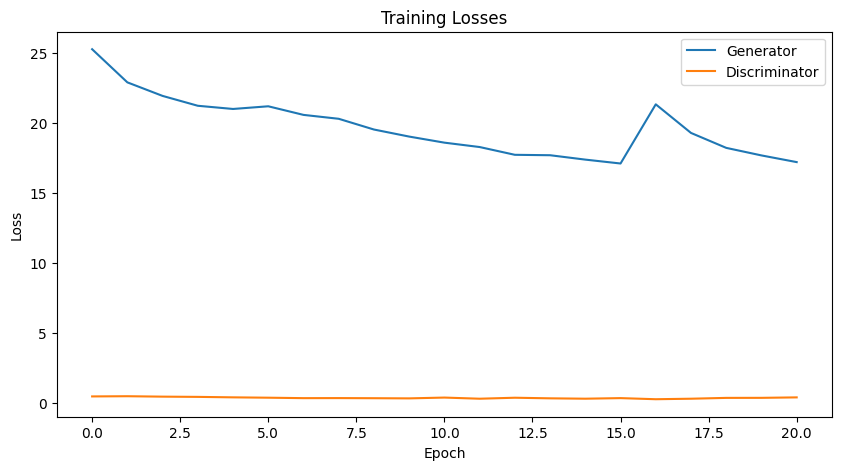

In [ ]:
import os
import time
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader, random_split
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm
import random
import numpy as np
from google.colab import drive

# ---------------------------
# 1. Google Drive & Checkpoint Directory Setup
# ---------------------------
drive.mount('/content/drive')
checkpoint_dir = '/content/drive/My Drive/GAN_Checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# ---------------------------
# 2. Reproducibility
# ---------------------------
random.seed(42)
torch.manual_seed(42)
np.random.seed(42)

# ---------------------------
# 3. Data Preprocessing & Loading
# ---------------------------
# Define dataset paths (adjust if needed)
dataset_dir = "/root/.cache/kagglehub/datasets/defileroff/comic-faces-paired-synthetic-v2/versions/1/face2comics_v2.0.0_by_Sxela/face2comics_v2.0.0_by_Sxela"
real_faces_path = os.path.join(dataset_dir, "faces")
cartoon_faces_path = os.path.join(dataset_dir, "comics")
processed_dataset_dir = "Comic_Faces/processed"
os.makedirs(processed_dataset_dir, exist_ok=True)

# Define transforms: resize to 256x256 and normalize to [-1, 1]
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Custom Dataset for paired images
class PairedFaceDataset(Dataset):
    def __init__(self, real_dir, cartoon_dir, transform=None):
        self.real_images = sorted(os.listdir(real_dir))
        self.cartoon_images = sorted(os.listdir(cartoon_dir))
        self.real_dir = real_dir
        self.cartoon_dir = cartoon_dir
        self.transform = transform
        # Use only pairs with matching filenames
        self.valid_pairs = [(r, c) for r, c in zip(self.real_images, self.cartoon_images) if r == c]
        print(f"✅ Found {len(self.valid_pairs)} valid image pairs")

    def __len__(self):
        return len(self.valid_pairs)

    def __getitem__(self, idx):
        real_image_path = os.path.join(self.real_dir, self.valid_pairs[idx][0])
        cartoon_image_path = os.path.join(self.cartoon_dir, self.valid_pairs[idx][1])
        real_image = Image.open(real_image_path).convert("RGB")
        cartoon_image = Image.open(cartoon_image_path).convert("RGB")
        if self.transform:
            real_image = self.transform(real_image)
            cartoon_image = self.transform(cartoon_image)
        return real_image, cartoon_image

dataset = PairedFaceDataset(real_faces_path, cartoon_faces_path, transform)
total_samples = len(dataset)
train_size = int(0.8 * total_samples)
test_size = total_samples - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=8, shuffle=False, num_workers=4)
print(f"Total samples: {total_samples} | Train: {train_size} | Test: {test_size}")

# ---------------------------
# 4. Model Definitions
# ---------------------------

# (A) Original TCNBlock kept for reference (not used)
class TCNBlock(nn.Module):
    def __init__(self, channels, kernel_size=3, dilation=2):
        super(TCNBlock, self).__init__()
        padding = (kernel_size - 1) * dilation // 2
        self.conv1d = nn.Conv1d(channels, channels, kernel_size, padding=padding, dilation=dilation)
        self.bn = nn.BatchNorm1d(channels)
        self.relu = nn.ReLU()
    def forward(self, x):
        B, C, H, W = x.shape
        x_reshaped = x.view(B, C, H * W)
        out = self.conv1d(x_reshaped)
        out = self.bn(out)
        out = self.relu(out)
        out = out.view(B, C, H, W)
        return out + x

# (B) NEW: Multi-dilation TCNBlock for improved multi-scale feature extraction
class MultiDilationTCNBlock(nn.Module):
    """
    Applies multiple 1D convolutions with different dilations and averages their outputs.
    """
    def __init__(self, channels, kernel_size=3, dilations=[1,2,4]):
        super(MultiDilationTCNBlock, self).__init__()
        self.convs = nn.ModuleList()
        for d in dilations:
            padding = (kernel_size - 1) * d // 2
            conv = nn.Conv1d(channels, channels, kernel_size, padding=padding, dilation=d)
            bn = nn.BatchNorm1d(channels)
            self.convs.append(nn.Sequential(conv, bn, nn.ReLU()))
    def forward(self, x):
        B, C, H, W = x.shape
        x_reshaped = x.view(B, C, H * W)
        out_sum = 0
        for conv_block in self.convs:
            out_sum += conv_block(x_reshaped)
        out = out_sum / len(self.convs)
        out = out.view(B, C, H, W)
        return out + x

# (C) Generator: U-Net with MultiDilation TCN Blocks and skip connections
class UNetTCNGenerator(nn.Module):
    def __init__(self):
        super(UNetTCNGenerator, self).__init__()
        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # 256 -> 128
            nn.LeakyReLU(0.2)
        )
        self.enc2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),  # 128 -> 64
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.enc3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),  # 64 -> 32
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )
        self.enc4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1),  # 32 -> 16
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )
        self.enc5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1),  # 16 -> 8
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )
        # Bottleneck with multi-dilation TCN blocks
        self.tcn1 = MultiDilationTCNBlock(channels=512, kernel_size=3, dilations=[1,2,4])
        self.tcn2 = MultiDilationTCNBlock(channels=512, kernel_size=3, dilations=[2,4,8])
        self.tcn3 = MultiDilationTCNBlock(channels=512, kernel_size=3, dilations=[4,8,16])
        # Decoder with skip connections
        self.dec5 = nn.Sequential(
            nn.ConvTranspose2d(512, 512, kernel_size=4, stride=2, padding=1),  # 8 -> 16
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.dec4 = nn.Sequential(
            nn.ConvTranspose2d(512*2, 256, kernel_size=4, stride=2, padding=1),  # 16 -> 32
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.dec3 = nn.Sequential(
            nn.ConvTranspose2d(256*2, 128, kernel_size=4, stride=2, padding=1),  # 32 -> 64
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.dec2 = nn.Sequential(
            nn.ConvTranspose2d(128*2, 64, kernel_size=4, stride=2, padding=1),   # 64 -> 128
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.dec1 = nn.Sequential(
            nn.ConvTranspose2d(64*2, 3, kernel_size=4, stride=2, padding=1),     # 128 -> 256
            nn.Tanh()  # output in [-1, 1]
        )
    def forward(self, x):
        e1 = self.enc1(x)    # (B,64,128,128)
        e2 = self.enc2(e1)   # (B,128,64,64)
        e3 = self.enc3(e2)   # (B,256,32,32)
        e4 = self.enc4(e3)   # (B,512,16,16)
        e5 = self.enc5(e4)   # (B,512,8,8)
        b = self.tcn1(e5)
        b = self.tcn2(b)
        b = self.tcn3(b)
        d5 = self.dec5(b)                         # (B,512,16,16)
        d4 = self.dec4(torch.cat([d5, e4], 1))      # (B,256,32,32)
        d3 = self.dec3(torch.cat([d4, e3], 1))      # (B,128,64,64)
        d2 = self.dec2(torch.cat([d3, e2], 1))      # (B,64,128,128)
        d1 = self.dec1(torch.cat([d2, e1], 1))      # (B,3,256,256)
        return d1

# (D) PatchGAN Discriminator
class PatchGANDiscriminator(nn.Module):
    def __init__(self):
        super(PatchGANDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(6, 64, kernel_size=4, stride=2, padding=1),   # 256 -> 128
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1),   # 128 -> 64
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1),   # 64 -> 32
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(256, 512, kernel_size=4, stride=1, padding=1),   # 32 -> 31
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(512, 1, kernel_size=4, stride=1, padding=1)      # 31 -> 30
        )
    def forward(self, real_img, cartoon_img):
        x = torch.cat([real_img, cartoon_img], dim=1)
        return self.model(x)

# ---------------------------
# 5. Loss Functions
# ---------------------------
class GANLoss(nn.Module):
    def __init__(self, target_real_label=1.0, target_fake_label=0.0):
        super(GANLoss, self).__init__()
        self.register_buffer('real_label', torch.tensor(target_real_label))
        self.register_buffer('fake_label', torch.tensor(target_fake_label))
        self.loss = nn.BCEWithLogitsLoss()
    def __call__(self, prediction, target_is_real):
        if target_is_real:
            target_tensor = self.real_label.expand_as(prediction)
        else:
            target_tensor = self.fake_label.expand_as(prediction)
        return self.loss(prediction, target_tensor)

# ---------------------------
# 6. Checkpoint Functions
# ---------------------------
def save_checkpoint(generator, discriminator, optimizer_G, optimizer_D, epoch, g_losses, d_losses):
    checkpoint_path = os.path.join(checkpoint_dir, f'checkpoint_epoch_{epoch}.pth')
    checkpoint = {
        'epoch': epoch,
        'generator_state_dict': generator.state_dict(),
        'discriminator_state_dict': discriminator.state_dict(),
        'optimizer_G_state_dict': optimizer_G.state_dict(),
        'optimizer_D_state_dict': optimizer_D.state_dict(),
        'g_losses': g_losses,
        'd_losses': d_losses
    }
    torch.save(checkpoint, checkpoint_path)
    print(f"✅ Checkpoint saved: {checkpoint_path}")
    # Also save generator separately for inference
    generator_path = os.path.join(checkpoint_dir, f'generator_epoch_{epoch}.pth')
    torch.save(generator.state_dict(), generator_path)
    print(f"✅ Generator saved: {generator_path}")
    return checkpoint_path

def load_checkpoint(checkpoint_path, generator, discriminator, optimizer_G, optimizer_D, device):
    print(f"Loading checkpoint from {checkpoint_path}...")
    checkpoint = torch.load(checkpoint_path, map_location=device)
    # Load model weights (using strict=False for architecture changes)
    generator.load_state_dict(checkpoint['generator_state_dict'], strict=False)
    discriminator.load_state_dict(checkpoint['discriminator_state_dict'], strict=False)
    start_epoch = checkpoint.get('epoch', 0)
    g_losses = checkpoint.get('g_losses', [])
    d_losses = checkpoint.get('d_losses', [])
    # Try loading optimizers; if mismatched, reinitialize them
    try:
        optimizer_G.load_state_dict(checkpoint['optimizer_G_state_dict'])
        optimizer_D.load_state_dict(checkpoint['optimizer_D_state_dict'])
    except ValueError as e:
        print("⚠️ Optimizer mismatch detected. Reinitializing optimizers...")
        optimizer_G = torch.optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
        optimizer_D = torch.optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
    print(f"✅ Checkpoint loaded successfully from epoch {start_epoch}")
    return generator, discriminator, optimizer_G, optimizer_D, start_epoch, g_losses, d_losses

def find_latest_checkpoint():
    checkpoint_files = [f for f in os.listdir(checkpoint_dir) if f.startswith('checkpoint_epoch_') and f.endswith('.pth')]
    if not checkpoint_files:
        return None
    epoch_nums = [int(f.split('_')[-1].split('.')[0]) for f in checkpoint_files]
    max_epoch = max(epoch_nums)
    latest_file = os.path.join(checkpoint_dir, f'checkpoint_epoch_{max_epoch}.pth')
    return latest_file, max_epoch

# ---------------------------
# 7. Training Function
# ---------------------------
def train(generator, discriminator, train_loader, test_loader, num_epochs, save_path='generator_final.pth',
          start_epoch=0, optimizer_G=None, optimizer_D=None, g_losses=None, d_losses=None):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")
    generator = generator.to(device)
    discriminator = discriminator.to(device)
    if optimizer_G is None:
        optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
    if optimizer_D is None:
        optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
    gan_loss = GANLoss().to(device)
    l1_loss = nn.L1Loss()
    lambda_L1 = 100
    if g_losses is None:
        g_losses = []
    if d_losses is None:
        d_losses = []
    print(f"{'Resuming' if start_epoch > 0 else 'Starting'} training from epoch {start_epoch + 1}...\n")
    for epoch in range(start_epoch, start_epoch + num_epochs):
        generator.train()
        discriminator.train()
        epoch_g_loss = 0
        epoch_d_loss = 0
        start_time = time.time()
        for i, (real_imgs, cartoon_imgs) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch+1}/{start_epoch + num_epochs}")):
            real_imgs = real_imgs.to(device)
            cartoon_imgs = cartoon_imgs.to(device)
            fake_cartoons = generator(real_imgs)
            optimizer_D.zero_grad()
            pred_real = discriminator(real_imgs, cartoon_imgs)
            loss_d_real = gan_loss(pred_real, True)
            pred_fake = discriminator(real_imgs, fake_cartoons.detach())
            loss_d_fake = gan_loss(pred_fake, False)
            loss_d = (loss_d_real + loss_d_fake) * 0.5
            loss_d.backward()
            optimizer_D.step()
            optimizer_G.zero_grad()
            pred_fake = discriminator(real_imgs, fake_cartoons)
            loss_g_gan = gan_loss(pred_fake, True)
            loss_g_l1 = l1_loss(fake_cartoons, cartoon_imgs) * lambda_L1
            loss_g = loss_g_gan + loss_g_l1
            loss_g.backward()
            optimizer_G.step()
            epoch_g_loss += loss_g.item()
            epoch_d_loss += loss_d.item()
            if (i+1) % 50 == 0:
                print(f"[Epoch {epoch+1}/{start_epoch + num_epochs}] [Batch {i+1}/{len(train_loader)}] "
                      f"[D loss: {loss_d.item():.4f}] [G loss: {loss_g.item():.4f}]")
        avg_g_loss = epoch_g_loss / len(train_loader)
        avg_d_loss = epoch_d_loss / len(train_loader)
        g_losses.append(avg_g_loss)
        d_losses.append(avg_d_loss)
        elapsed = time.time() - start_time
        print(f"Epoch {epoch+1}/{start_epoch + num_epochs} completed: [D loss: {avg_d_loss:.4f}] [G loss: {avg_g_loss:.4f}] | Time: {elapsed:.2f} sec\n")
        evaluate(generator, test_loader, device, epoch)
        save_checkpoint(generator, discriminator, optimizer_G, optimizer_D, epoch, g_losses, d_losses)
    final_path = os.path.join(checkpoint_dir, save_path)
    torch.save(generator.state_dict(), final_path)
    print(f"✅ Training Completed! Final model saved as {final_path}\n")
    plt.figure(figsize=(10, 5))
    plt.plot(g_losses, label='Generator')
    plt.plot(d_losses, label='Discriminator')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training Losses')
    loss_plot_path = os.path.join(checkpoint_dir, 'training_losses.png')
    plt.savefig(loss_plot_path)
    plt.show()
    return generator

# ---------------------------
# 8. Evaluation Function
# ---------------------------
def evaluate(generator, test_loader, device, epoch):
    generator.eval()
    with torch.no_grad():
        real_imgs, cartoon_imgs = next(iter(test_loader))
        real_imgs = real_imgs.to(device)
        cartoon_imgs = cartoon_imgs.to(device)
        fake_cartoons = generator(real_imgs)
        sample_images = []
        for i in range(min(3, real_imgs.size(0))):
            real_img = real_imgs[i].cpu().detach()
            cartoon_img = cartoon_imgs[i].cpu().detach()
            fake_cartoon = fake_cartoons[i].cpu().detach()
            real_img = (real_img * 0.5 + 0.5).clamp(0, 1)
            cartoon_img = (cartoon_img * 0.5 + 0.5).clamp(0, 1)
            fake_cartoon = (fake_cartoon * 0.5 + 0.5).clamp(0, 1)
            sample_images.extend([real_img, cartoon_img, fake_cartoon])
        grid = torchvision.utils.make_grid(sample_images, nrow=3)
        sample_path = os.path.join(checkpoint_dir, f'samples_epoch_{epoch+1}.png')
        torchvision.utils.save_image(grid, sample_path)
        print(f"✅ Sample images saved: {sample_path}")

# ---------------------------
# 9. Inference Function
# ---------------------------
def denormalize(tensor):
    return tensor * 0.5 + 0.5

def cartoonize_image(model_path, image_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    generator = UNetTCNGenerator().to(device)
    generator.load_state_dict(torch.load(model_path, map_location=device))
    generator.eval()
    input_image = Image.open(image_path).convert("RGB")
    input_tensor = transform(input_image).unsqueeze(0).to(device)
    with torch.no_grad():
        cartoon_tensor = generator(input_tensor)
    cartoon_tensor = denormalize(cartoon_tensor.squeeze(0)).cpu().clamp(0, 1)
    cartoon_image = transforms.ToPILImage()(cartoon_tensor)
    result_path = os.path.join(checkpoint_dir, 'cartoonization_result.png')
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.title("Original Real Face")
    plt.axis("off")
    plt.subplot(1, 2, 2)
    plt.imshow(cartoon_image)
    plt.title("Cartoonized Face")
    plt.axis("off")
    plt.savefig(result_path)
    plt.show()
    cartoon_save_path = os.path.join(checkpoint_dir, 'cartoonized_face.png')
    cartoon_image.save(cartoon_save_path)
    print(f"✅ Cartoonized image saved to: {cartoon_save_path}")
    return cartoon_image

# ---------------------------
# 10. Main Execution
# ---------------------------
if __name__ == "__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    latest_checkpoint, last_epoch = find_latest_checkpoint() if find_latest_checkpoint() else (None, 0)
    if latest_checkpoint:
        print(f"Found existing checkpoint from epoch {last_epoch}")
        resume_training = input(f"Would you like to resume training from epoch {last_epoch+1}? (y/n): ").lower() == 'y'
        if resume_training:
            # Initialize models and optimizers
            generator = UNetTCNGenerator().to(device)
            discriminator = PatchGANDiscriminator().to(device)
            optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
            optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))
            generator, discriminator, optimizer_G, optimizer_D, start_epoch, g_losses, d_losses = load_checkpoint(
                latest_checkpoint, generator, discriminator, optimizer_G, optimizer_D, device
            )
            total_epochs = 20
            remaining_epochs = total_epochs - start_epoch
            if remaining_epochs <= 0:
                print("Training already completed! You can run inference.")
            else:
                print(f"Resuming training for {remaining_epochs} more epochs...")
                trained_generator = train(
                    generator,
                    discriminator,
                    train_loader,
                    test_loader,
                    num_epochs=remaining_epochs,
                    save_path='generator_final.pth',
                    start_epoch=start_epoch,
                    optimizer_G=optimizer_G,
                    optimizer_D=optimizer_D,
                    g_losses=g_losses,
                    d_losses=d_losses
                )
        else:
            print("Starting new training session...")
            generator = UNetTCNGenerator()
            discriminator = PatchGANDiscriminator()
            trained_generator = train(generator, discriminator, train_loader, test_loader, num_epochs=30, save_path='generator_final.pth')
    else:
        print("No existing checkpoints found. Starting fresh training...")
        generator = UNetTCNGenerator()
        discriminator = PatchGANDiscriminator()
        trained_generator = train(generator, discriminator, train_loader, test_loader, num_epochs=30, save_path='generator_final.pth')
    run_inference = input("Would you like to cartoonize an image using the trained model? (y/n): ").lower() == 'y'
    if run_inference:
        model_path = os.path.join(checkpoint_dir, 'generator_final.pth')
        if not os.path.exists(model_path):
            latest_gen_files = [f for f in os.listdir(checkpoint_dir) if f.startswith('generator_epoch_') and f.endswith('.pth')]
            if latest_gen_files:
                epoch_nums = [int(f.split('_')[-1].split('.')[0]) for f in latest_gen_files]
                max_epoch = max(epoch_nums)
                model_path = os.path.join(checkpoint_dir, f'generator_epoch_{max_epoch}.pth')
        input_image_path = input("Enter the path to a real face image: ")
        cartoonized_image = cartoonize_image(model_path, input_image_path)


In [ ]:
import os
import shutil
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import drive, files

# ---------------------------
# Mount Google Drive
# ---------------------------
drive.mount('/content/drive')

# ---------------------------
# Define transformation (same as used in training)
# ---------------------------
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

def denormalize(tensor):
    return tensor * 0.5 + 0.5

# ---------------------------
# TCN Block (naming matches saved model's state_dict keys)
# ---------------------------
class TCNBlock(nn.Module):
    def __init__(self, channels, kernel_size=3, dilation=2):
        super(TCNBlock, self).__init__()
        padding = (kernel_size - 1) * dilation // 2
        self.convs = nn.Sequential(
            nn.Conv1d(channels, channels, kernel_size, padding=padding, dilation=dilation),
            nn.BatchNorm1d(channels),
            nn.ReLU()
        )

    def forward(self, x):
        # x: (B, C, H, W) -> reshape to (B, C, H*W)
        B, C, H, W = x.shape
        x_reshaped = x.view(B, C, H * W)
        out = self.convs(x_reshaped)
        out = out.view(B, C, H, W)
        return out + x  # residual connection

# ---------------------------
# UNetTCNGenerator (matching training code)
# ---------------------------
class UNetTCNGenerator(nn.Module):
    def __init__(self):
        super(UNetTCNGenerator, self).__init__()
        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # 256 -> 128
            nn.LeakyReLU(0.2)
        )
        self.enc2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 128 -> 64
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.enc3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 64 -> 32
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )
        self.enc4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1), # 32 -> 16
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )
        self.enc5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1), # 16 -> 8
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )

        # Bottleneck with TCN blocks
        self.tcn1 = TCNBlock(channels=512, kernel_size=3, dilation=1)
        self.tcn2 = TCNBlock(channels=512, kernel_size=3, dilation=2)
        self.tcn3 = TCNBlock(channels=512, kernel_size=3, dilation=4)

        # Decoder with skip connections
        self.dec5 = nn.Sequential(
            nn.ConvTranspose2d(512, 512, kernel_size=4, stride=2, padding=1),  # 8 -> 16
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.dec4 = nn.Sequential(
            nn.ConvTranspose2d(512*2, 256, kernel_size=4, stride=2, padding=1),  # 16 -> 32
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.dec3 = nn.Sequential(
            nn.ConvTranspose2d(256*2, 128, kernel_size=4, stride=2, padding=1),  # 32 -> 64
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.dec2 = nn.Sequential(
            nn.ConvTranspose2d(128*2, 64, kernel_size=4, stride=2, padding=1),   # 64 -> 128
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.dec1 = nn.Sequential(
            nn.ConvTranspose2d(64*2, 3, kernel_size=4, stride=2, padding=1),    # 128 -> 256
            nn.Tanh()  # output in [-1, 1]
        )

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)    # (B,64,128,128)
        e2 = self.enc2(e1)   # (B,128,64,64)
        e3 = self.enc3(e2)   # (B,256,32,32)
        e4 = self.enc4(e3)   # (B,512,16,16)
        e5 = self.enc5(e4)   # (B,512,8,8)

        # Bottleneck with TCN blocks
        b = self.tcn1(e5)
        b = self.tcn2(b)
        b = self.tcn3(b)

        # Decoder with skip connections
        d5 = self.dec5(b)                        # (B,512,16,16)
        d4 = self.dec4(torch.cat([d5, e4], 1))     # (B,256,32,32)
        d3 = self.dec3(torch.cat([d4, e3], 1))     # (B,128,64,64)
        d2 = self.dec2(torch.cat([d3, e2], 1))     # (B,64,128,128)
        d1 = self.dec1(torch.cat([d2, e1], 1))     # (B,3,256,256)

        return d1

# ---------------------------
# Helper functions for file handling in Colab & Drive
# ---------------------------
def upload_file(prompt_text):
    print(prompt_text)
    uploaded = files.upload()
    if not uploaded:
        raise FileNotFoundError("No file was uploaded!")
    # Return the first (and usually only) uploaded file name
    return list(uploaded.keys())[0]

def ensure_file_exists(file_path, upload_prompt, drive_save_path=None):
    """
    Check if file_path exists.
    If not, prompt the user to upload it.
    Optionally, if drive_save_path is provided, copy the uploaded file there.
    """
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        uploaded_filename = upload_file(upload_prompt)
        if drive_save_path:
            # Copy the uploaded file to the desired Drive location
            shutil.copy(uploaded_filename, drive_save_path)
            print(f"Uploaded file saved to: {drive_save_path}")
            return drive_save_path
        return uploaded_filename
    return file_path

# ---------------------------
# Model Loading and Inference Functions
# ---------------------------
def load_generator(model_path, device):
    generator = UNetTCNGenerator().to(device)
    state_dict = torch.load(model_path, map_location=device)
    # Use strict=False if there are minor key mismatches
    generator.load_state_dict(state_dict, strict=False)
    generator.eval()
    return generator

def cartoonize_image(model_path, image_path):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    # Expected paths on Drive
    drive_model_path = "/content/drive/MyDrive/cartoon_model.pth"
    drive_output_path = "/content/drive/MyDrive/cartoonized.png"

    # Ensure the model file exists; if not, prompt and save to Drive
    model_path = ensure_file_exists(model_path,
                                    "Upload your trained generator model (.pth file):",
                                    drive_save_path=drive_model_path)

    # Ensure the input image exists; if not, prompt for upload (saving to current directory)
    image_path = ensure_file_exists(image_path, "Upload your real face image:")

    # Load the generator model
    generator = load_generator(model_path, device)

    # Load and process the input image
    input_image = Image.open(image_path).convert("RGB")
    input_tensor = transform(input_image).unsqueeze(0).to(device)

    # Generate the cartoonized version
    with torch.no_grad():
        cartoon_tensor = generator(input_tensor)

    # Denormalize and convert to PIL image
    cartoon_tensor = denormalize(cartoon_tensor.squeeze(0)).cpu().clamp(0, 1)
    cartoon_image = transforms.ToPILImage()(cartoon_tensor)

    # Save the output image to Google Drive as a .png file
    cartoon_image.save(drive_output_path)
    print(f"Cartoonized image saved to: {drive_output_path}")

    # Display side-by-side for comparison
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.title("Original Face")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cartoon_image)
    plt.title("Cartoonized Face")
    plt.axis("off")
    plt.show()

    return cartoon_image

# ---------------------------
# Main Execution
# ---------------------------
if __name__ == "__main__":
    # Specify default file paths:
    # For model, we expect it in Drive. If not found, you'll be prompted to upload.
    default_model_path = "/content/drive/MyDrive/cartoon_model.pth"
    # Specify a default image path (adjust as needed)
    default_image_path = "/content/sample_image.jpg"

    # Run cartoonization
    cartoonized_image = cartoonize_image(default_model_path, default_image_path)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
File not found: /content/sample_image.jpg
Upload your real face image:


KeyboardInterrupt: 

Google Drive is already mounted.
Face Cartoonizer with Google Drive Storage
Output directory: /content/drive/MyDrive/cartoonizer_output
Note: Both input and output images will be saved to Google Drive
Using device: cpu
File not found: /content/input_face.jpg
Upload your real face image:


Saving 0.jpg to 0.jpg
File saved to Google Drive: /content/drive/MyDrive/cartoonizer_output/0.jpg
Model loaded successfully.
Input image processed.
Generating cartoon...
Cartoon generation complete.
Cartoonized image saved to: /content/drive/MyDrive/cartoonizer_output/0_cartoon_20250401_074424_a8075fa4.png
Comparison image saved to: /content/drive/MyDrive/cartoonizer_output/0_comparison_20250401_074424_a8075fa4.png


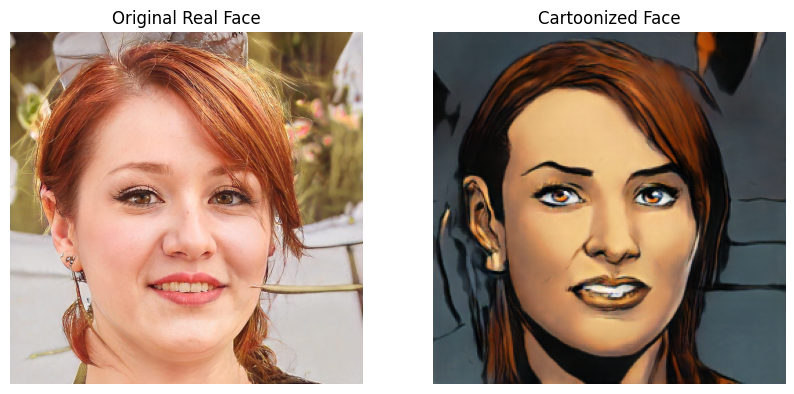


Process complete!
Cartoonized image saved to: /content/drive/MyDrive/cartoonizer_output/0_cartoon_20250401_074424_a8075fa4.png


In [4]:
import os
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import torchvision.utils
from google.colab import files, drive
import datetime
import uuid

# Mount Google Drive if not already mounted
def mount_drive():
    try:
        drive_mounted = os.path.exists('/content/drive')
        if not drive_mounted:
            drive.mount('/content/drive')
            print("Google Drive mounted successfully.")
        else:
            print("Google Drive is already mounted.")

        # Create output directory if it doesn't exist
        output_dir = '/content/drive/MyDrive/cartoonizer_output'
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)
            print(f"Created output directory: {output_dir}")

        return output_dir
    except Exception as e:
        print(f"Error mounting drive: {e}")
        return None

# Define the transformation (same as used in training)
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

def denormalize(tensor):
    return tensor * 0.5 + 0.5

# ---------------------------
# TCN Block (matching training code)
# ---------------------------
class TCNBlock(nn.Module):
    def __init__(self, channels, kernel_size=3, dilation=2):
        super(TCNBlock, self).__init__()
        padding = (kernel_size - 1) * dilation // 2
        self.conv1d = nn.Conv1d(channels, channels, kernel_size, padding=padding, dilation=dilation)
        self.bn = nn.BatchNorm1d(channels)
        self.relu = nn.ReLU()

    def forward(self, x):
        # x: (B, C, H, W) -> reshape to (B, C, H*W)
        B, C, H, W = x.shape
        x_reshaped = x.view(B, C, H * W)
        out = self.conv1d(x_reshaped)
        out = self.bn(out)
        out = self.relu(out)
        # Reshape back to (B, C, H, W)
        out = out.view(B, C, H, W)
        return out + x  # residual connection

# ---------------------------
# UNetTCNGenerator (matching training code)
# ---------------------------
class UNetTCNGenerator(nn.Module):
    def __init__(self):
        super(UNetTCNGenerator, self).__init__()
        # Encoder
        self.enc1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=4, stride=2, padding=1),  # 256 -> 128
            nn.LeakyReLU(0.2)
        )
        self.enc2 = nn.Sequential(
            nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1), # 128 -> 64
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2)
        )
        self.enc3 = nn.Sequential(
            nn.Conv2d(128, 256, kernel_size=4, stride=2, padding=1), # 64 -> 32
            nn.BatchNorm2d(256),
            nn.LeakyReLU(0.2)
        )
        self.enc4 = nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=4, stride=2, padding=1), # 32 -> 16
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )
        self.enc5 = nn.Sequential(
            nn.Conv2d(512, 512, kernel_size=4, stride=2, padding=1), # 16 -> 8
            nn.BatchNorm2d(512),
            nn.LeakyReLU(0.2)
        )

        # Bottleneck with TCN blocks
        self.tcn1 = TCNBlock(channels=512, kernel_size=3, dilation=1)
        self.tcn2 = TCNBlock(channels=512, kernel_size=3, dilation=2)
        self.tcn3 = TCNBlock(channels=512, kernel_size=3, dilation=4)

        # Decoder with skip connections
        self.dec5 = nn.Sequential(
            nn.ConvTranspose2d(512, 512, kernel_size=4, stride=2, padding=1),  # 8 -> 16
            nn.BatchNorm2d(512),
            nn.ReLU()
        )
        self.dec4 = nn.Sequential(
            nn.ConvTranspose2d(512*2, 256, kernel_size=4, stride=2, padding=1),  # 16 -> 32
            nn.BatchNorm2d(256),
            nn.ReLU()
        )
        self.dec3 = nn.Sequential(
            nn.ConvTranspose2d(256*2, 128, kernel_size=4, stride=2, padding=1),  # 32 -> 64
            nn.BatchNorm2d(128),
            nn.ReLU()
        )
        self.dec2 = nn.Sequential(
            nn.ConvTranspose2d(128*2, 64, kernel_size=4, stride=2, padding=1),   # 64 -> 128
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.dec1 = nn.Sequential(
            nn.ConvTranspose2d(64*2, 3, kernel_size=4, stride=2, padding=1),    # 128 -> 256
            nn.Tanh()  # output in [-1, 1]
        )

    def forward(self, x):
        # Encoder
        e1 = self.enc1(x)    # (B,64,128,128)
        e2 = self.enc2(e1)   # (B,128,64,64)
        e3 = self.enc3(e2)   # (B,256,32,32)
        e4 = self.enc4(e3)   # (B,512,16,16)
        e5 = self.enc5(e4)   # (B,512,8,8)

        # Bottleneck with TCN blocks
        b = self.tcn1(e5)
        b = self.tcn2(b)
        b = self.tcn3(b)

        # Decoder with skip connections
        d5 = self.dec5(b)                        # (B,512,16,16)
        d4 = self.dec4(torch.cat([d5, e4], 1))     # (B,256,32,32)
        d3 = self.dec3(torch.cat([d4, e3], 1))     # (B,128,64,64)
        d2 = self.dec2(torch.cat([d3, e2], 1))     # (B,64,128,128)
        d1 = self.dec1(torch.cat([d2, e1], 1))     # (B,3,256,256)

        return d1

# ---------------------------
# Improved Helper Functions for File Handling
# ---------------------------
def upload_file(prompt_text):
    print(prompt_text)
    uploaded = files.upload()
    if not uploaded:
        raise FileNotFoundError("No file was uploaded!")

    # Return the first (and usually only) uploaded file name and its content
    file_name = list(uploaded.keys())[0]
    temp_path = f"/content/{file_name}"

    # Write content to the temporary file
    with open(temp_path, 'wb') as f:
        f.write(uploaded[file_name])

    return temp_path

def ensure_file_exists(file_path, upload_prompt, output_dir=None):
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
        temp_path = upload_file(upload_prompt)

        # If output_dir is provided, save a copy to Google Drive
        if output_dir:
            # Get just the filename
            file_name = os.path.basename(temp_path)

            # Create a path in Google Drive
            drive_path = os.path.join(output_dir, file_name)

            # Copy the file to Drive
            import shutil
            shutil.copyfile(temp_path, drive_path)
            print(f"File saved to Google Drive: {drive_path}")

            return drive_path
        else:
            return temp_path

    return file_path

# ---------------------------
# Model Loading and Inference Functions with Drive Support
# ---------------------------
def load_generator(model_path, device):
    generator = UNetTCNGenerator().to(device)
    state_dict = torch.load(model_path, map_location=device)
    generator.load_state_dict(state_dict)
    generator.eval()
    return generator

def cartoonize_image(model_path, image_path, output_dir):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Ensure both files exist (or get them via upload)
    model_path = ensure_file_exists(model_path, "Upload your trained generator model (.pth file):")
    image_path = ensure_file_exists(image_path, "Upload your real face image:", output_dir)

    # Get base filename for the input image
    input_basename = os.path.splitext(os.path.basename(image_path))[0]

    # Create timestamp and unique ID for output naming
    timestamp = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")
    unique_id = str(uuid.uuid4())[:8]

    # Load the generator model
    generator = load_generator(model_path, device)
    print("Model loaded successfully.")

    # Load and process the input image
    input_image = Image.open(image_path).convert("RGB")
    input_tensor = transform(input_image).unsqueeze(0).to(device)
    print("Input image processed.")

    # Generate the cartoonized version
    print("Generating cartoon...")
    with torch.no_grad():
        cartoon_tensor = generator(input_tensor)

    # Denormalize and convert to PIL image
    cartoon_tensor = denormalize(cartoon_tensor.squeeze(0)).cpu().clamp(0, 1)
    cartoon_image = transforms.ToPILImage()(cartoon_tensor)
    print("Cartoon generation complete.")

    # Save the cartoonized image to Google Drive
    cartoon_filename = f"{input_basename}_cartoon_{timestamp}_{unique_id}.png"
    cartoon_save_path = os.path.join(output_dir, cartoon_filename)
    cartoon_image.save(cartoon_save_path)
    print(f"Cartoonized image saved to: {cartoon_save_path}")

    # Display side-by-side
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(input_image)
    plt.title("Original Real Face")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(cartoon_image)
    plt.title("Cartoonized Face")
    plt.axis("off")

    # Save the comparison figure to Google Drive
    comparison_filename = f"{input_basename}_comparison_{timestamp}_{unique_id}.png"
    comparison_save_path = os.path.join(output_dir, comparison_filename)
    plt.savefig(comparison_save_path)
    print(f"Comparison image saved to: {comparison_save_path}")

    plt.show()
    return cartoon_image, cartoon_save_path

# ---------------------------
# Main Execution with Drive Support
# ---------------------------
if __name__ == "__main__":
    # Mount Google Drive and get output directory
    output_dir = mount_drive()
    if not output_dir:
        print("Failed to mount Google Drive. Using local storage instead.")
        output_dir = "/content/output"
        if not os.path.exists(output_dir):
            os.makedirs(output_dir)

    # Specify default file paths
    default_model_path = '/content/drive/MyDrive/cartoon_model.pth'
    default_image_path = '/content/input_face.jpg'

    print("=" * 50)
    print("Face Cartoonizer with Google Drive Storage")
    print("=" * 50)
    print(f"Output directory: {output_dir}")
    print("Note: Both input and output images will be saved to Google Drive")
    print("=" * 50)

    # Attempt to cartoonize using the specified file paths or prompt for upload if not found
    cartoonized_image, saved_path = cartoonize_image(default_model_path, default_image_path, output_dir)

    print("\nProcess complete!")
    print(f"Cartoonized image saved to: {saved_path}")